In [8]:
# Import packages
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from matplotlib import cm
import matplotlib
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon
import os
# Set plot parameters
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'font.family': 'serif',
   'legend.fontsize': 10,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [9]:
#%matplotlib widget

C:\Users\Carlota\AppData\Local\Temp\ipykernel_28060\3635292116.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


<BarContainer object of 12 artists>

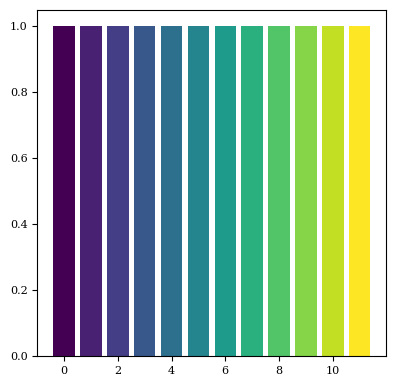

In [10]:
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

a = range(len(cmap1))
b = np.ones(len(a))

plt.bar(a,b, color = cmap1)

# No Perturbation

Load data

In [11]:
fig_path = 'C:/Users/Carlota/Desktop/NewFigs'
policy = '2023_05_17_18_05_04'
env_name = 'myoLegReachFixed-v1'
pkl_path = '../pkl/' + env_name + '/' + policy 

data_path = pkl_path + '.pkl'

with open(data_path, "rb") as input_file:
   data = pickle.load(input_file)

finalReward = {}
for d in data['modelInfo']['rewardDict']:
    for key, value in d.items():
        if key not in finalReward:
            finalReward[key] = []
        finalReward[key].append(value)
data['modelInfo']['rewardDict'] = {}
data['modelInfo']['rewardDict'] = finalReward


save = True # Mark as True to save the plots in fig_path
pkl_path = '../pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
superDict = {}
for k in range(100):
    data_path = pkl_path + str(k) + '.pkl'
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    superDict[k] = data
ntrials = len(superDict)

for i in range(ntrials): 
    finalReward = {}
    for d in superDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    superDict[i]['modelInfo']['rewardDict'] = {}
    superDict[i]['modelInfo']['rewardDict'] = finalReward

In [12]:
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

# Generate an array of values ranging from 0 to 1
values = np.linspace(0, 1, ntrials)
cmap = ListedColormap(plt.cm.viridis(values)).colors

C:\Users\Carlota\AppData\Local\Temp\ipykernel_28060\1939104910.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


Does it ever fall? 

In [13]:
when_list, mag_list = [], []
for i in range(ntrials):
    arr = superDict[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    when_list.append(when)

nonzero_values = []
idx = []
for i, value in  enumerate(when_list):
    if value != 0:
        idx.append(i)
        nonzero_values.append(value)

print(f'Succes rate: {100*len(when_list)/ntrials} %')

Succes rate: 100.0 %


Train Reward

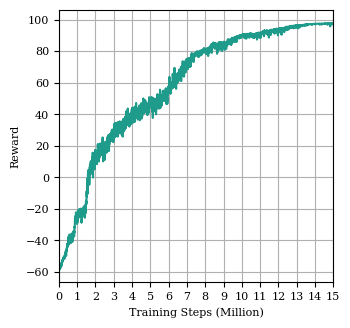

In [14]:
# Train reward
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3.54, 3.54))
x = np.linspace(0, data['modelInfo']['trainingSteps']/1000000, len(data['tensorBoard']['epMeanReward']))
ax.plot(x, data['tensorBoard']['epMeanReward'], color = cmap1[6])
ax.set_xlim(x[0], 15)
ax.set_xticks(np.round(np.linspace(x[0],15, 16)))
ax.set_xlabel('Training Steps (Million)')
ax.set_ylabel('Reward')
ax.grid()

if save: 
    fig_name = 'trainingReward'
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight') 

Mean Error + SD

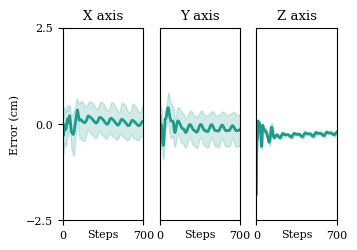

In [15]:
error = []
for i in range(ntrials): 
    error.append(np.array(superDict[i]['modelInfo']['reachError']).T)

error_x, error_y, error_z = [],[],[]
for i in range(len(error)): 
    if i in idx: continue
    else: 
        error_x.append(error[i][0])
        error_y.append(error[i][1])
        error_z.append(error[i][2])

f, ax = plt.subplots(nrows = 1, ncols =3, figsize = (3.54, 2.5)) 
l = ['X axis', 'Y axis', 'Z axis']
lim = 2.5
for i in range(3): 
    if i == 0: data = error_x
    elif i == 1: data = error_y
    elif i == 2: data = error_z
    mean = np.mean(data, axis = 0)*100
    std = np.std(data, axis = 0)*100
    ax[i].plot(mean, color=cmap1[6], linewidth = 2)
    ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[6], alpha=0.2)
    ax[i].set_ylim(-lim, lim)
    ax[i].set_yticks([-lim, 0, lim])
    ax[i].set_title(l[i])
    ax[i].set_xlim(0, 700)
    ax[i].set_xticks([0, 700]) 
    ax[i].set_xlabel('Steps')
    ax[i].xaxis.set_label_coords(.5, -0.05)
    if i != 0: ax[i].set_yticks([])
    if i == 2: ax[i].set_xticks([0, 700])  
ax[0].set_ylabel('Error (cm)')
#ax[2].xaxis.set_label_coords(.5, -0.1)
# plt.tight_layout()

if save: 
    fig_name = '_meanError'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name +'.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean COM displacement + SD

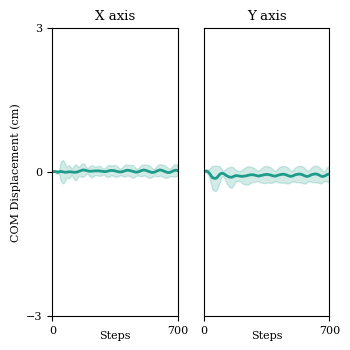

In [16]:
com = []
for i in range(ntrials): 
    com.append(np.array(superDict[i]['bodyInfo']['com']).T)

com_x, com_y = [],[]
for i in range(len(com)): 
    if i in idx: continue
    else: 
        com_x.append(com[i][0])
        com_y.append(com[i][1])

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (3.54, 3.54)) 

lim = 3
l = ['X axis', 'Y axis']
for i in range(2): 
    if i == 0: data = com_x - com_x[0]
    elif i == 1: data = com_y - com_y[0]
    mean = np.mean(data, axis = 0)*100
    std = np.std(data, axis = 0)*100
    ax[i].plot(mean, color=cmap1[6], linewidth = 2)
    ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[6], alpha=0.2)
    ax[i].set_ylim(-lim, lim)
    ax[i].set_title(l[i])
    ax[i].set_xlim(0, 700)
    if i != 2: ax[i].set_yticks([])
    ax[i].set_xticks([0, 700])  
    ax[i].set_xlabel('Steps')
    ax[i].xaxis.set_label_coords(.5, -0.05)
ax[0].set_yticks([-lim, 0, lim])
ax[0].set_ylabel('COM Displacement (cm)')
plt.tight_layout()

if save: 
    fig_name = '_meancomDisp'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean COM Movement Scatter

C:\Users\Carlota\AppData\Local\Temp\ipykernel_28060\1602230182.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 29)
C:\Users\Carlota\AppData\Local\Temp\ipykernel_28060\1602230182.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(corners[:,[0,1,3,2]].T, color = 'white', closed=True, fill=True, alpha = 0.2, edgecolor='none')


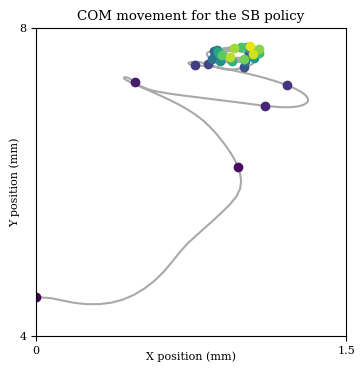

In [17]:
from matplotlib.patches import Polygon

bos_list, com_list = [], []

for t in range(ntrials): 
    data = superDict[t]
    bos_list.append(np.array(data['bodyInfo']['bos']))
    com_list.append(np.array(data['bodyInfo']['com']))

com_mean = np.mean(com_list, axis = 0)
bos_mean = np.mean(bos_list, axis = 0)
com_std = np.std(com_list, axis = 0)
bos_std = np.std(bos_list, axis = 0)
viridis = cm.get_cmap('viridis', 29)
cmap3 = viridis.colors

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
for i in range(0, 701, 100): 
    if i == 700: i = 699
    corners = bos_mean[i,:].reshape(2,4)
    polygon = Polygon(corners[:,[0,1,3,2]].T, color = 'white', closed=True, fill=True, alpha = 0.2, edgecolor='none')
    ax.add_patch(polygon)   
ax.plot(com_mean[:,0], com_mean[:,1], color = 'darkgray')


for j, i in enumerate(range(0, data['modelInfo']['testSteps'], 25)):
        ax.plot(com_mean[i][0], com_mean[i][1], color = cmap3[j], marker = 'o')
        # ax.errorbar(com_mean[i][0], com_mean[i][1], yerr = com_std[i,1], xerr = com_std[i,0], color = cmap1[6], alpha = 0.5)

ax.set_yticks([0.04, 0.08], [4, 8])
ax.set_xticks([-0.00068662, 0.015], [0, 1.5])
ax.set_xlim(-0.00068662, 0.015)
ax.set_ylim(0.04, 0.08)
ax.set_title('COM movement for the SB policy')
ax.set_xlabel('X position (mm)')
ax.set_ylabel('Y position (mm)')
ax.xaxis.set_label_coords(.5, -0.05)
ax.yaxis.set_label_coords(-0.05,0.5)

if save: 
    fig_name = '_com_movement'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean Muscle Activations

In [18]:
Ract, Lact = [], []
for i in range(ntrials): 
    data = superDict[i]
    muscleAct = np.array(data['muscleInfo']['muscleActivation']).T
    Ract.append(muscleAct[:40, :])
    Lact.append(muscleAct[40:, :])

Ract_mean = np.mean(Ract, axis = 0)
Lact_mean = np.mean(Lact, axis = 0)

data = superDict[0]
tendonNames = data['modelInfo']['tendonNames']
muscleNames = []

for tendon in tendonNames[:40]:
    muscle = tendon.replace('_r_tendon', '')
    muscleNames.append(muscle)

# Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

# Get the indices that would sort the musnames array in the desired order
sorted_indices = np.argsort([desired_order.index(name) for name in muscleNames])

musnames_sorted, Rmusact_sorted, Lmusact_sorted = [], [], []

for k in sorted_indices: 
    musnames_sorted.append(muscleNames[k])
    Rmusact_sorted.append(Ract_mean[k])
    Lmusact_sorted.append(Lact_mean[k])

ract = np.array(Rmusact_sorted)
lact = np.array(Lmusact_sorted)


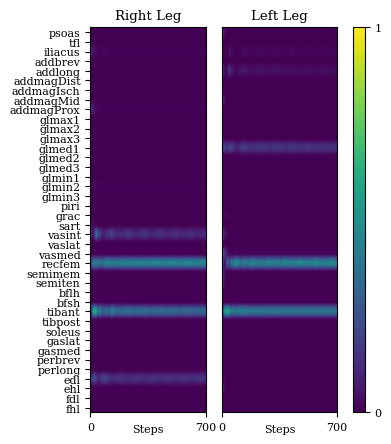

In [19]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(3.54, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.1])
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]


cmaps = ['viridis', 'viridis']
for row in range(2):
    ax = axs[row]
    if row == 0:
        data_plot = ract
    elif row == 1:
        data_plot = lact
    pcm = ax.imshow(data_plot, cmap='viridis', aspect='auto', vmin=0, vmax=1)
    ax.set_yticks(range(40), musnames_sorted, fontsize=8)
    
    if row == 0:
        ax.set_xticks([])
        
    if row == 1:
        ax.set_yticks([])
        
        cbar = fig.colorbar(pcm, ax=axs, cax=fig.add_subplot(gs[2]), ticks=[0, 1])
        cbar.ax.yaxis.set_ticks([0, 1])
    
    ax.set_xticks([0, 700])
    ax.set_xlabel('Steps')
    ax.xaxis.set_label_coords(.5, -0.03)

axs[0].set_title('Right Leg')
axs[1].set_title('Left Leg')
fig.subplots_adjust(wspace=0.2)

if save: 
    fig_name = '_musAct'
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    fig.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Mean Joint Angles and Torques + SD

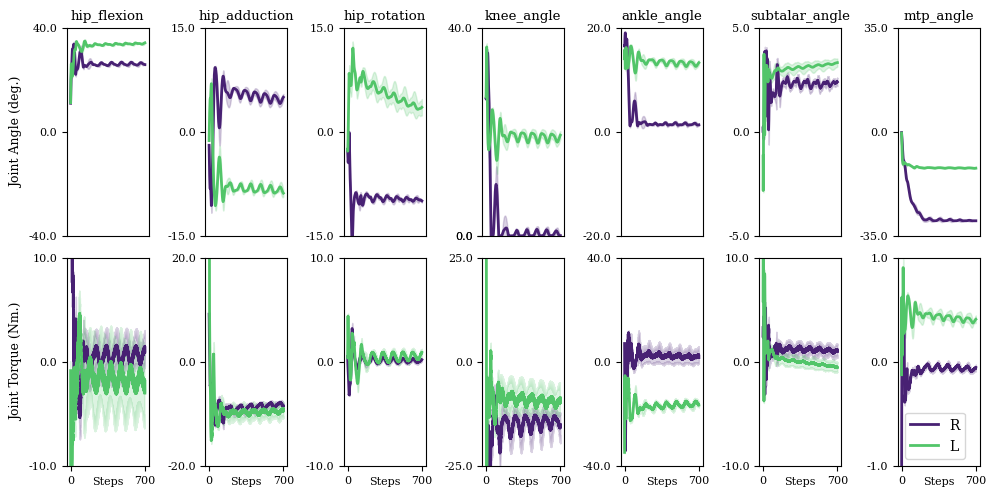

In [25]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter

not_interested = ['knee_angle_r_translation2', 'knee_angle_r_translation1', 'knee_angle_r_rotation2', 'knee_angle_r_rotation3', 'knee_angle_r_beta_translation2', 'knee_angle_r_beta_translation1', 'knee_angle_r_beta_rotation1',  'knee_angle_l_translation2', 'knee_angle_l_translation1', 'knee_angle_l_rotation2', 'knee_angle_l_rotation3', 'knee_angle_l_beta_translation2', 'knee_angle_l_beta_translation1', 'knee_angle_l_beta_rotation1']

# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-40, 40],
    'Hip Adduction': [-15, 15],
    'Hip Rotation': [-15, 15],
    'Knee Angle': [0, 40],
    'Ankle Angle': [-20, 20],
    'Subtalar Angle': [-5, 5],
    'MTP Angle': [-35, 35]
}

rom_dict = {
    'Hip Flexion': [-10, 10],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-10, 10],
    'Knee Angle': [-25, 25],
    'Ankle Angle': [-40, 40],
    'Subtalar Angle': [-10, 10],
    'MTP Angle': [-1, 1]
}

yl = ['Joint Angle (deg.)', 'Joint Torque (Nm.)']
k = [1,8] 
ll = ['R', 'L']
f, axs = plt.subplots(nrows=2, ncols=7, figsize = (10,5))
qtau, qpos = [], []
for i in range(ntrials): 
    qtau.append(superDict[i]['jointInfo']['qtau'])
    qpos.append(superDict[i]['jointInfo']['qpos'])

qtau_dict, qpos_dict = {}, {}

for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        qtau_dict[joint], qpos_dict[joint] = {}, {}
        for j in range(len(qtau)): 
            qpos_dict[joint][j] = np.rad2deg(qpos[j][joint])
            qtau_dict[joint][j] = qtau[j][joint]

mean_dict, sd_dict = {}, {}
for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        tau = []
        mean_dict[joint], sd_dict[joint] = {}, {}
        for j in range(len( qpos_dict[joint])): 
            tau.append(qpos_dict[joint][j])
        mean_dict[joint] = np.mean(tau, axis = 0)
        sd_dict[joint] = np.std(tau, axis = 0)
steps = 700
for i, (movement, keys) in enumerate(movement_dict.items()):
    # print(keys)
    for l, key in enumerate(keys):

        if l == 0: a = 0
        if l == 1: a = 0 
        # ax  = axs[i]
        axs[a, i].plot(mean_dict[key], color = cmap1[k[l]], linewidth= 2, label = ll[l] )
        axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap1[k[l]], alpha=0.2)

        if a == 0: axs[a,i].set_title(key[:-2])
        axs[a,i].set_xticks([])
        axs[a,i].set_ylim(rom_dict_qpos[movement])
        axs[a,i].set_yticks(rom_dict_qpos[movement])
        axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
        axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[a,0].set_ylabel(yl[a], fontsize = 9)

mean_dict, sd_dict = {}, {}
for joint in superDict[i]['modelInfo']['jointNames']: 
    if joint not in not_interested:
        tau = []
        mean_dict[joint], sd_dict[joint] = {}, {}
        for j in range(len( qtau_dict[joint])): 
            tau.append(qtau_dict[joint][j])
        mean_dict[joint] = np.mean(tau, axis = 0)
        sd_dict[joint] = np.std(tau, axis = 0)
steps = 700
for i, (movement, keys) in enumerate(movement_dict.items()):
    # print(keys)
    for l, key in enumerate(keys):

        if l == 0: a = 1
        if l == 1: a = 1 
        # ax  = axs[i]
        axs[a, i].plot(mean_dict[key], color = cmap1[k[l]], linewidth= 2, label = ll[l] )
        axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap1[k[l]], alpha=0.2)

        axs[a,i].set_xticks([0, 700])
        axs[a,i].set_xlabel('Steps')
        axs[a,i].set_ylim(rom_dict[movement])
        axs[a,i].set_yticks(rom_dict[movement])
        axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
        axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[a,0].set_ylabel(yl[a], fontsize = 9) 
        axs[a, i].xaxis.set_label_coords(.5, -0.05)

axs[a,6].legend()
f.tight_layout()

if save: 
    fig_name = '_jointAnglesTorques'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

# AP Perturbation

Load data

In [13]:
fig_path = 'C:/Users/Carlota/Desktop/NewFigs'

# Load policy results
policy = '2023_05_25_17_25_29'
env_name = 'myoLegReachFixed-v2'
pkl_path = 'C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
perturbation_id = 1 # 1 - AP, 0 - ML

save = True # Mark as True to save the plots in fig_path
dataDict = {}
for k in range(200):
    data_path = pkl_path + str(k) + '.pkl'
    #print(data_path)
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    dataDict[k] = data
ntrials = len(dataDict)

# Rearrange reward dictionary
for i in range(ntrials): 
    finalReward = {}
    for d in dataDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    dataDict[i]['modelInfo']['rewardDict'] = {}
    dataDict[i]['modelInfo']['rewardDict'] = finalReward


## Arrange dictionary based on magnitude of perturbation force. 
data1 = []
for i in range(ntrials): 
    data1.append([i, np.round(dataDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(dataDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*dataDict[i]["modelInfo"]["perturbationTime"], 0)])

df1 = pd.DataFrame(data = data1,columns = ["Trial", "Magnitude", "Time", "Step"])
df_find = df1
order = df1.sort_values(by='Magnitude')['Trial']

superDict = {}
for i, j in enumerate(order): 
    superDict[i] = dataDict[j]

## Arrange dictionary based on magnitude of perturbation force. 
data = []
for i in range(ntrials): 
    data.append([i, np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(superDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*superDict[i]["modelInfo"]["perturbationTime"], 0)])
df = pd.DataFrame(data = data,columns = ["Trial", "Magnitude", "Time", "Step"])



In [14]:
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

# Generate an array of values ranging from 0 to 1
values = np.linspace(0, 1, ntrials)
cmap = ListedColormap(plt.cm.viridis(values)).colors



C:\Users\Carlota\AppData\Local\Temp\ipykernel_1140\461824756.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


When does the model fall

Succes rate: 96.0 %


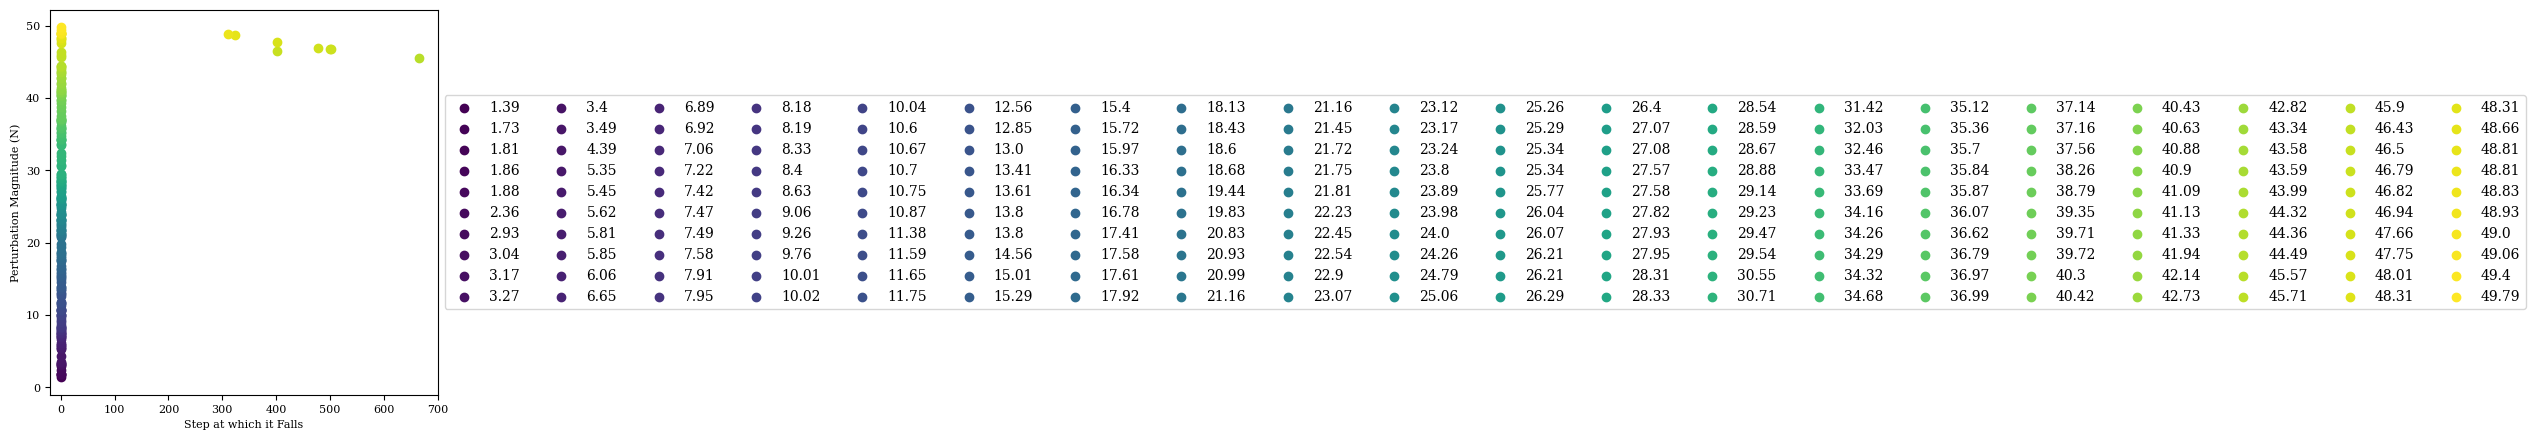

In [15]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

when_list, mag_list = [], []
for i in range(ntrials):
    arr = superDict[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    mag = (np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2))
    when_list.append(when)
    mag_list.append(mag)
    ax.scatter(when, mag, label = mag, color = cmap[i])

ax.set_xlim(-20, 700)
ax.legend(loc='center left', ncols = ntrials /10,  bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Perturbation Magnitude (N)')
ax.set_xlabel('Step at which it Falls')

nonzero_values = []
idx = []
for i, value in  enumerate(when_list):
    if value != 0:
        idx.append(i)
        nonzero_values.append(value)

print(f'Succes rate: {100*when_list.count(0)/ntrials} %')

Highest perturbation it can withstand

In [16]:
pert_when, pert_mag = [],[]
for i in range(len(when_list)): 
    if when_list[i] == 0: continue
    else: 
        pert_when.append(when_list[i])
        pert_mag.append(mag_list[i])

print(f'Perturbation border: {np.min(pert_mag)} N ') # highest perturbation that it can withstand

Perturbation border: 45.57 N 


## Plots per perturbation range

In [17]:
dictCombined = {}
ddd = []
for j in range(5): dictCombined[j] = {}

for i in range(ntrials): 
    perturbationMagnitude = superDict[i]['modelInfo']['perturbationMagnitude'][perturbation_id]
    if np.round(perturbationMagnitude,2) in pert_mag: ddd.append(perturbationMagnitude)
    if perturbationMagnitude <= 10: d = 0
    elif 10 < perturbationMagnitude <= 20: d = 1
    elif 20 < perturbationMagnitude <= 30: d = 2
    elif 30 < perturbationMagnitude <= 40: d = 3
    elif 40 < perturbationMagnitude <= 50: d = 4

    l = len(dictCombined[d])
    dictCombined[d][l] = superDict[i]

ranges = ['0-10', '10-20', '20-30', '30-40', '40-50']

## Plot muscle activations
zo = np.linspace(4, 0, num=len(dictCombined)) # for the order in the figure
## Plot muscle activations
c = np.linspace(0, len(cmap1) - 1, len(dictCombined), dtype=int)
cmap2 = cmap1[c]
cmap2 = cmap2[::-1]

Muscle Activations

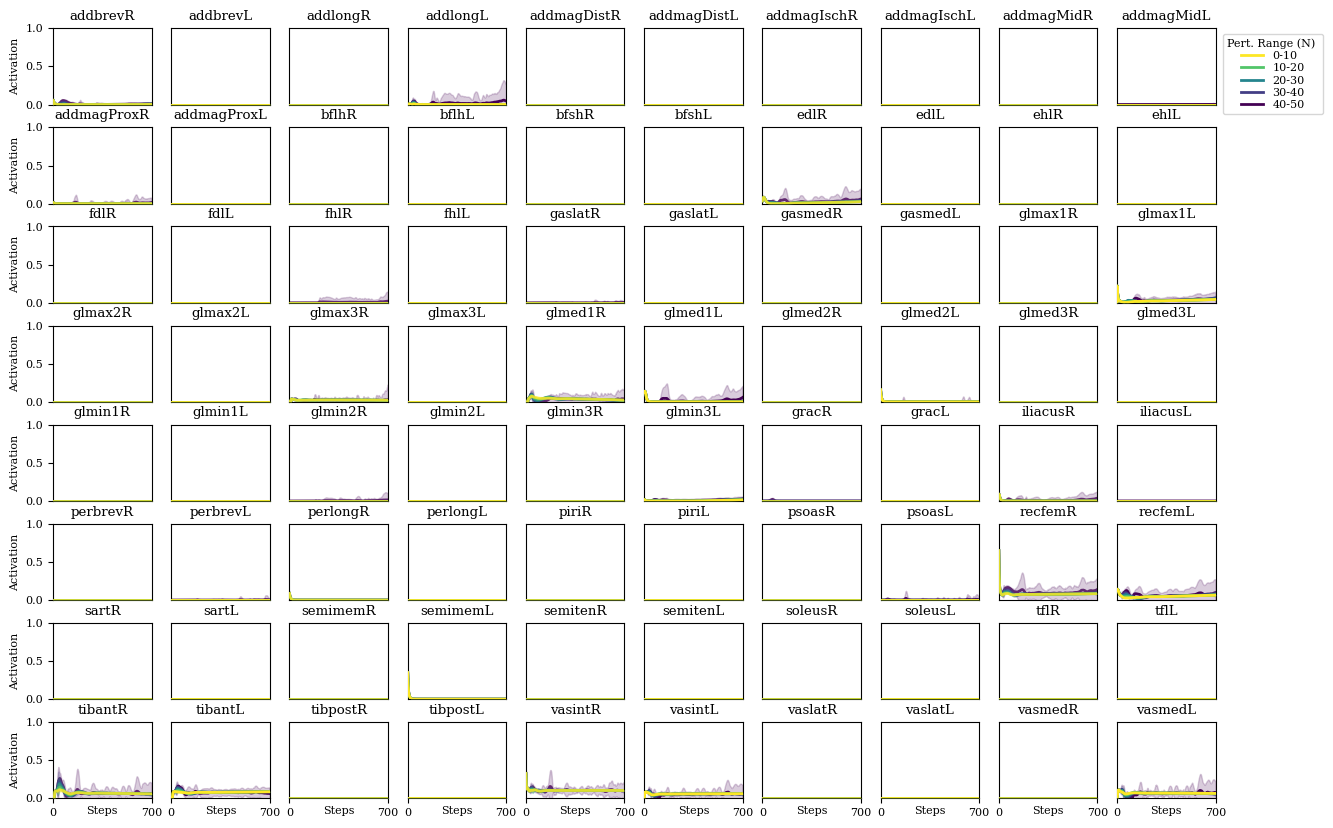

In [18]:
 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

f, axs  = plt.subplots(nrows = 8, ncols = 10, figsize = (15, 10))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []
for r in range(5): 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = dictCombined[r]

    tendonNames = superDict1[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        if data['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: 
            muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
            RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
            LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        act_muscle = []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit = tendonNames[i].replace('_r_tendon', 'R')
        ax[i*2].set_title(tit)
        ax[i*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], alpha=0.8, zorder = zo[r])

        ax[i*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
        act_muscle = []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i+40])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
        ax[i*2+1].set_title(tit2)
        ax[i*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2 + 1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])

for i in range(80): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in range(0,80,10): ax[i].set_yticks([])
    else: 
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 70: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[9].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(2.15, 1))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    fig_name = 'meanActSD_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

In [19]:
relevant = ['addbrev_r_tendon',  'addlong_r_tendon', 'addmagMid_r_tendon', 'addmagProx_r_tendon', 'edl_r_tendon', 'glmax1_r_tendon', 'glmax3_r_tendon', 'glmed1_r_tendon', 'glmin2_r_tendon', 'iliacus_r_tendon', 'perbrev_r_tendon', 'psoas_r_tendon', 'recfem_r_tendon', 'tibant_r_tendon', 'vasint_r_tendon',  'vasmed_r_tendon']

len(relevant)

16

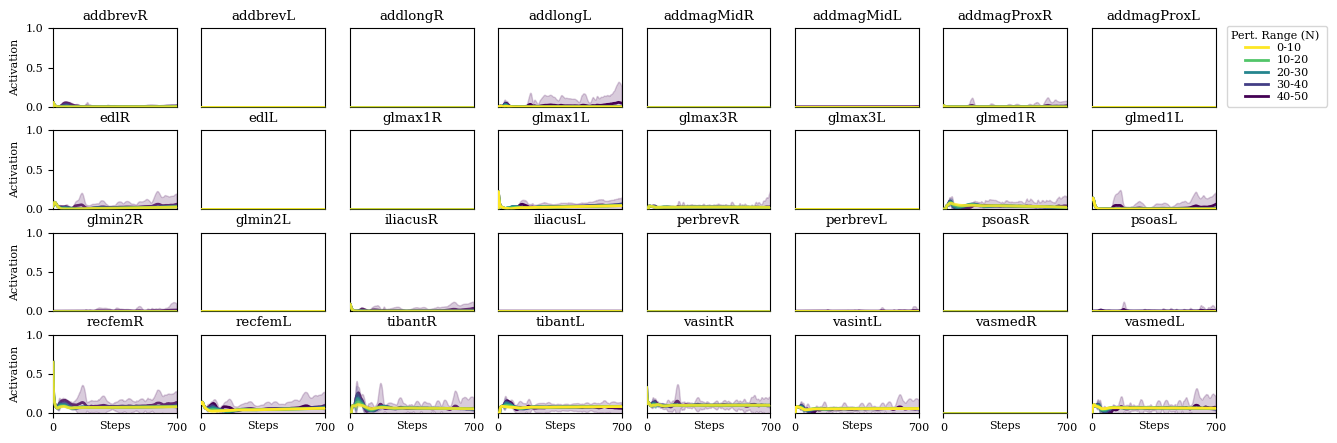

In [20]:
 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

relevant = ['addbrev_r_tendon',  'addlong_r_tendon', 'addmagMid_r_tendon', 'addmagProx_r_tendon', 'edl_r_tendon', 'glmax1_r_tendon', 'glmax3_r_tendon', 'glmed1_r_tendon', 'glmin2_r_tendon', 'iliacus_r_tendon', 'perbrev_r_tendon', 'psoas_r_tendon', 'recfem_r_tendon', 'tibant_r_tendon', 'vasint_r_tendon',  'vasmed_r_tendon']

f, axs  = plt.subplots(nrows = 4, ncols = 8, figsize = (15,5))
ax = axs.flatten()


r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []
for r in range(5):
    plot = 0 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = dictCombined[r]

    tendonNames = superDict1[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        if data['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: 
            muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
            RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
            LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        if tendonNames[i] in relevant: 
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)

            tit = tendonNames[i].replace('_r_tendon', 'R')
            ax[plot*2].set_title(tit)
            ax[plot*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], alpha=0.8, zorder = zo[r])

            ax[plot*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i+40])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)
            tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
            ax[plot*2+1].set_title(tit2)
            ax[plot*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
            ax[plot*2 + 1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            plot += 1

for i in range(32): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in [0, 8, 16, 24]: ax[i].set_yticks([])
    else: 
        ax[i].set_yticks([0, 0.5, 1])
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 24: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[7].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1.95, 1.1))
#f.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    fig_name = 'filtered_meanActSD_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight') 

Joint Angles and Torques SD

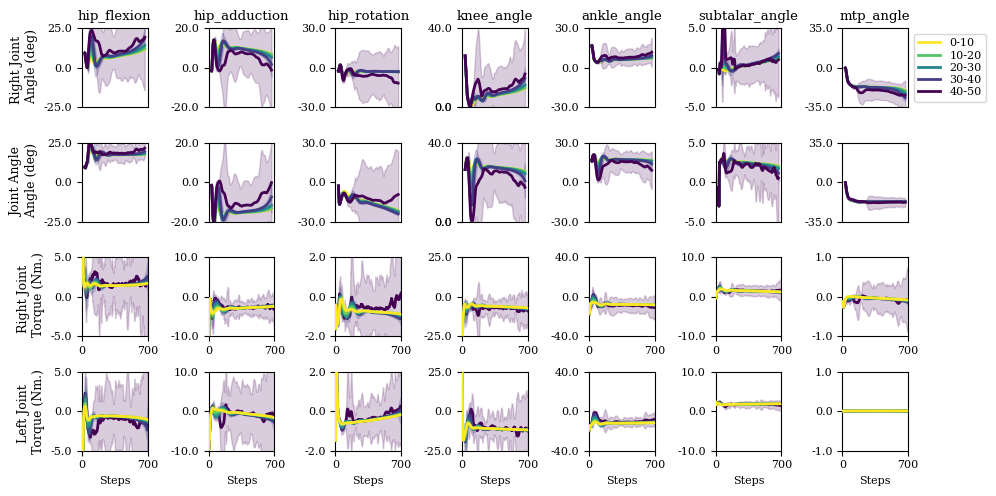

In [21]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter


# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-25, 25],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-30, 30],
    'Knee Angle': [0, 40],
    'Ankle Angle': [-30, 30],
    'Subtalar Angle': [-5, 5],
    'MTP Angle': [-35, 35]
}

rom_dict = {
    'Hip Flexion': [-5, 5],
    'Hip Adduction': [-10, 10],
    'Hip Rotation': [-2, 2],
    'Knee Angle': [-25, 25],
    'Ankle Angle': [-40, 40],
    'Subtalar Angle': [-10, 10],
    'MTP Angle': [-1, 1]
}

f, axs = plt.subplots(nrows=4, ncols=7, figsize = (10,5))

yl = ['Right Joint \n Angle (deg)', 'Joint Angle\n Angle (deg)', 'Right Joint \n Torque (Nm.)', 'Left Joint \nTorque (Nm.)']
ll = ['R', 'L']
for r in range(len(dictCombined)): 
    
    qtau = []
    for j in range(len(dictCombined[r])): 
        if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: qtau.append(dictCombined[r][j]['jointInfo']['qpos'])

    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            if joint not in not_interested:
                qtau_dict[joint] = {}
                for j in range(len(qtau)): 
                    qtau_dict[joint][j] = np.rad2deg(qtau[j][joint])

        mean_dict, sd_dict = {}, {}
        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)
        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):

                if l == 0: a = 0
                if l == 1: a = 1 
                # ax  = axs[i]
                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r] )
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2)
                if a == 0: axs[a,i].set_title(key[:-2])
                axs[a,i].set_xticks([])
                axs[a,i].set_ylim(rom_dict_qpos[movement])
                axs[a,i].set_yticks(rom_dict_qpos[movement])
                axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                axs[a,0].set_ylabel(yl[a], fontsize = 9)  
        axs[0,6].legend(fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
        

    qtau = []
    for j in range(len(dictCombined[r])): 
        if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: qtau.append(dictCombined[r][j]['jointInfo']['qtau'])
    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            qtau_dict[joint] = {}
            for j in range(len(qtau)): 
                qtau_dict[joint][j] = qtau[j][joint]

        mean_dict, sd_dict = {}, {}
        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)

        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):
                if l == 0: a = 2
                if l == 1: a = 3 

                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r] , zorder = zo[r])
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])
                # axs[1,i].set_title(key)
                axs[a,i].set_ylim(rom_dict[movement])
                # axs[a,i].set_yticks(rom_dict[movement])
                axs[a,i].set_xticks([0, 700])
                axs[a,i].set_xlim(0, 700)
                axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
                if a ==3: axs[a,i].set_xlabel('Steps')
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

                axs[a,0].set_ylabel(yl[a], fontsize = 9) 
f.tight_layout()

if save:
    fig_name = 'meanAngleTorqueSD_pertRange'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')    

## Plots including the fallen ones

In [22]:
combined = {}
combined[5] = {}
j = 0
for i in range(len(dictCombined)): 
    if i < 1: continue
    else: 
        combined[i] = {}

        for j in range(len(dictCombined[i])): 
            
            mag = dictCombined[i][j]['modelInfo']['perturbationMagnitude'][perturbation_id]
            if mag in ddd: 
                b = len(combined[5])
                combined[5][b] = dictCombined[i][j]
            else: 
                a = len(combined[i])
                combined[i][a] = dictCombined[i][j]

combined[0]  = combined.pop(1)
combined[1]  = combined.pop(2)
combined[2]  = combined.pop(3)
combined[3]  = combined.pop(4)
combined[4]  = combined.pop(5)


# combined[j] = fallenCombined[0]
# ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', 'Fallen']
ranges = ['10-20', '20-30', '30-40', '40-50', 'Fallen']
zo = np.linspace(len(combined)-1, 0, num=len(combined)) # for the order in the figure

c = np.linspace(0, len(cmap1) - 1, len(dictCombined), dtype=int)
cmap2 = cmap1[c]
cmap2 = cmap2[::-1] 

Muscle Activation SD

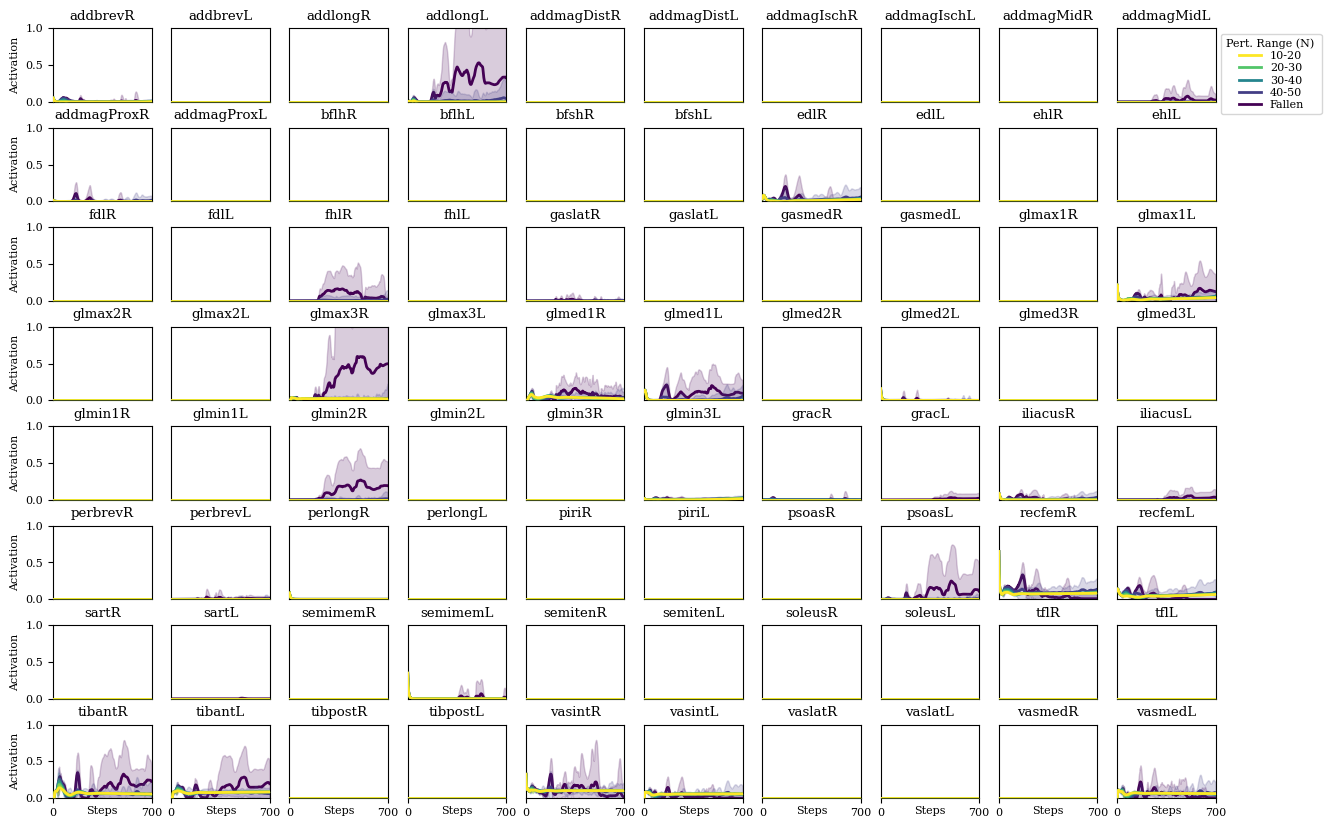

In [23]:
## Plot muscle activations

 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

f, axs  = plt.subplots(nrows = 8, ncols = 10, figsize = (15, 10))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []

for r in range(len(combined)): 
    
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = combined[r]

    tendonNames = superDict[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
        RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
        LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        act_muscle = []
        mean_act, std_act = [], []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit = tendonNames[i].replace('_r_tendon', 'R')
        ax[i*2].set_title(tit)
        ax[i*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])

        act_muscle = []
        mean_act, std_act = [], []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i+40])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
        ax[i*2+1].set_title(tit2)
        ax[i*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2+1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])


for i in range(80): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in range(0,80,10): ax[i].set_yticks([])
    else: 
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 70: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[9].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
plt.subplots_adjust(wspace=0.2, hspace=0.35)

if save:
    fig_name = 'meanActivationSD_pertRangeFallenCombined'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

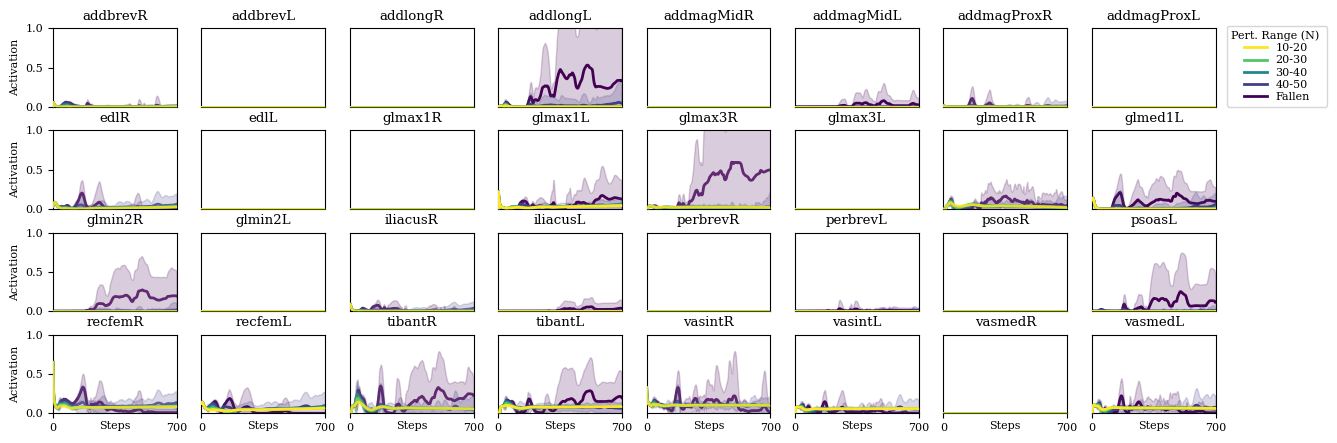

In [24]:
## Plot muscle activations

 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

f, axs  = plt.subplots(nrows = 4, ncols = 8, figsize = (15, 5))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []

for r in range(len(combined)): 
    plot = 0 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = combined[r]

    tendonNames = superDict[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
        RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
        LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        if tendonNames[i] in relevant: 
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)

            tit = tendonNames[i].replace('_r_tendon', 'R')
            ax[plot*2].set_title(tit)
            ax[plot*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], alpha=0.8, zorder = zo[r])

            ax[plot*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i+40])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)
            tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
            ax[plot*2+1].set_title(tit2)
            ax[plot*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
            ax[plot*2 + 1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            plot += 1

for i in range(32): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in [0, 8, 16, 24]: ax[i].set_yticks([])
    else: 
        ax[i].set_yticks([0, 0.5, 1])
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 24: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[7].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1.95, 1.1))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    fig_name = 'filtered_meanActivationSD_pertRangeFallenCombined'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Joint Angles and Torques SD

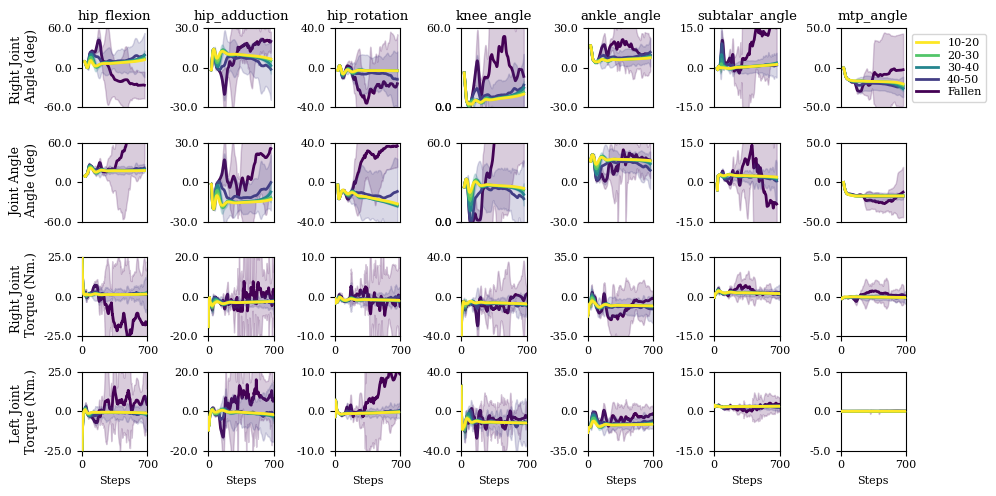

In [25]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter


# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-60, 60],
    'Hip Adduction': [-30, 30],
    'Hip Rotation': [-40, 40],
    'Knee Angle': [0, 60],
    'Ankle Angle': [-30, 30],
    'Subtalar Angle': [-15, 15],
    'MTP Angle': [-50, 50]
}

rom_dict = {
    'Hip Flexion': [-25, 25],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-10, 10],
    'Knee Angle': [-40, 40],
    'Ankle Angle': [-35, 35],
    'Subtalar Angle': [-15, 15],
    'MTP Angle': [-5, 5]
}

f, axs = plt.subplots(nrows=4, ncols=7, figsize = (10,5))

yl = ['Right Joint \n Angle (deg)', 'Joint Angle\n Angle (deg)', 'Right Joint \n Torque (Nm.)', 'Left Joint \nTorque (Nm.)']
ll = ['R', 'L']
for r in range(len(combined)): 
    
    qtau = []
    for j in range(len(combined[r])): 
        qtau.append(combined[r][j]['jointInfo']['qpos'])

    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in combined[r][j]['modelInfo']['jointNames']: 
            if joint not in not_interested:
                qtau_dict[joint] = {}
                for j in range(len(qtau)): 
                    qtau_dict[joint][j] = np.rad2deg(qtau[j][joint])

        mean_dict, sd_dict = {}, {}
        for joint in combined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)
        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):

                if l == 0: a = 0
                if l == 1: a = 1 
                # ax  = axs[i]
                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r], zorder = zo[r])
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])
                if a == 0: axs[a,i].set_title(key[:-2])
                axs[a,i].set_xticks([])
                axs[a,i].set_ylim(rom_dict_qpos[movement])
                axs[a,i].set_yticks(rom_dict_qpos[movement])
                axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                axs[a,0].set_ylabel(yl[a], fontsize = 9)  
        axs[0,6].legend(fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
        

    qtau = []
    for j in range(len(combined[r])): 
        
        qtau.append(combined[r][j]['jointInfo']['qtau'])
    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in combined[r][j]['modelInfo']['jointNames']: 
            qtau_dict[joint] = {}
            for j in range(len(qtau)): 
                qtau_dict[joint][j] = qtau[j][joint]

        mean_dict, sd_dict = {}, {}
        for joint in combined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)

        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):
                if l == 0: a = 2
                if l == 1: a = 3 

                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r] , zorder = zo[r])
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])
                # axs[1,i].set_title(key)
                axs[a,i].set_ylim(rom_dict[movement])
                # axs[a,i].set_yticks(rom_dict[movement])
                axs[a,i].set_xticks([0, 700])
                axs[a,i].set_xlim(0, 700)
                axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
                if a ==3: axs[a,i].set_xlabel('Steps')
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

                axs[a,0].set_ylabel(yl[a], fontsize = 9) 
f.tight_layout()
if save:
    fig_name = 'jointAngleAndTorqueSD_FallenCombined_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')



# ML Perturbation

Load data

In [26]:
fig_path = 'C:/Users/Carlota/Desktop/NewFigs'


# Load policy results
policy = '2023_06_21_21_18_35'
env_name = 'myoLegReachFixed-v2'
pkl_path = 'C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
perturbation_id = 0 # 1 - AP, 0 - ML

save = True # Mark as True to save the plots in fig_path
dataDict = {}
for k in range(200):
    data_path = pkl_path + str(k) + '.pkl'
    print(data_path)
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    dataDict[k] = data
ntrials = len(dataDict)

# Rearrange reward dictionary
for i in range(ntrials): 
    finalReward = {}
    for d in dataDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    dataDict[i]['modelInfo']['rewardDict'] = {}
    dataDict[i]['modelInfo']['rewardDict'] = finalReward


## Arrange dictionary based on magnitude of perturbation force. 
data1 = []
for i in range(ntrials): 
    data1.append([i, np.round(dataDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(dataDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*dataDict[i]["modelInfo"]["perturbationTime"], 0)])

df1 = pd.DataFrame(data = data1,columns = ["Trial", "Magnitude", "Time", "Step"])
df_find = df1
order = df1.sort_values(by='Magnitude')['Trial']

superDict = {}
for i, j in enumerate(order): 
    superDict[i] = dataDict[j]

## Arrange dictionary based on magnitude of perturbation force. 
data = []
for i in range(ntrials): 
    data.append([i, np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(superDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*superDict[i]["modelInfo"]["perturbationTime"], 0)])
df = pd.DataFrame(data = data,columns = ["Trial", "Magnitude", "Time", "Step"])



C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_0.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_1.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_2.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_3.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_4.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_5.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_3

In [27]:
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

# Generate an array of values ranging from 0 to 1
values = np.linspace(0, 1, ntrials)
cmap = ListedColormap(plt.cm.viridis(values)).colors


C:\Users\Carlota\AppData\Local\Temp\ipykernel_1140\3369043752.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


When does the model fall

Succes rate: 71.0 %


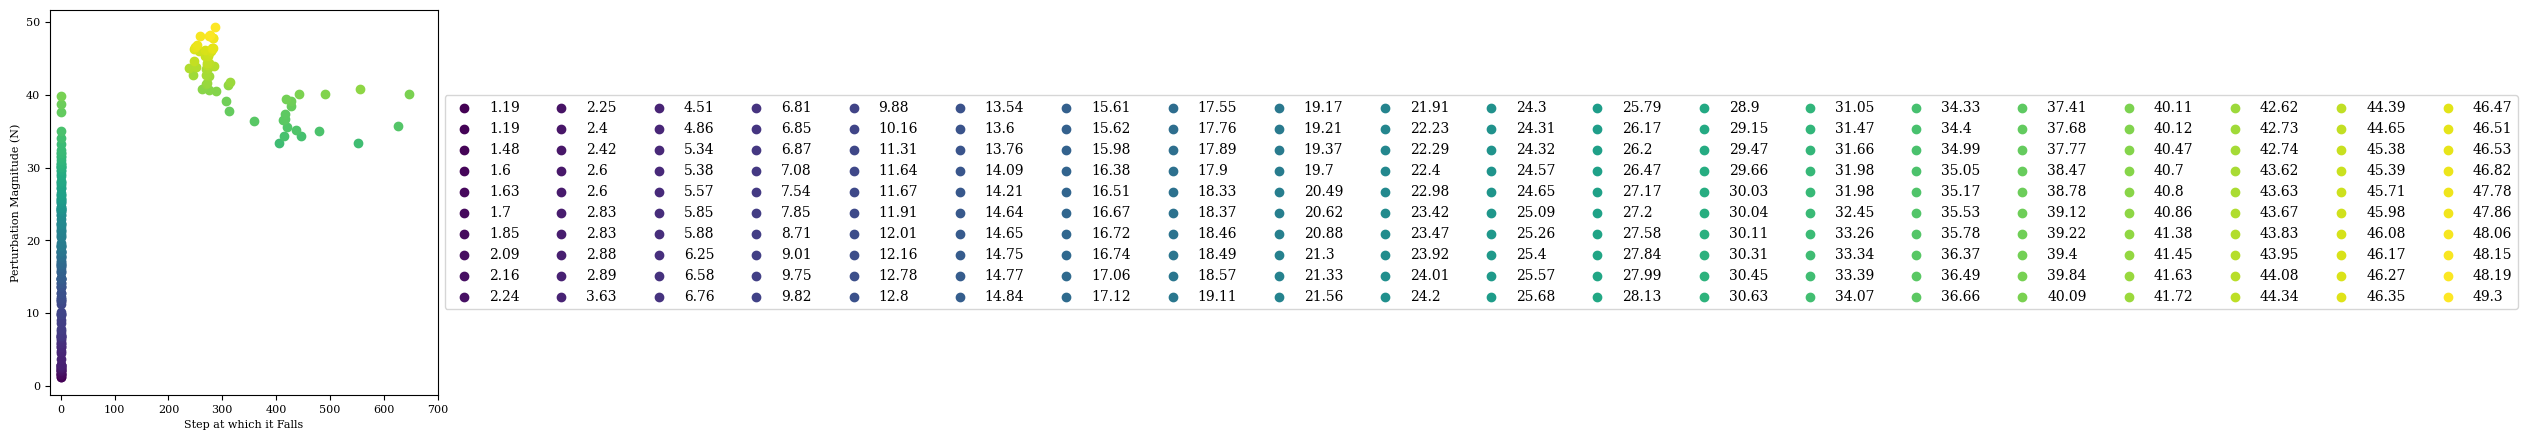

In [28]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

when_list, mag_list = [], []
for i in range(ntrials):
    arr = superDict[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    mag = (np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2))
    when_list.append(when)
    mag_list.append(mag)
    ax.scatter(when, mag, label = mag, color = cmap[i])

ax.set_xlim(-20, 700)
ax.legend(loc='center left', ncols = ntrials /10,  bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Perturbation Magnitude (N)')
ax.set_xlabel('Step at which it Falls')

nonzero_values = []
idx = []
for i, value in  enumerate(when_list):
    if value != 0:
        idx.append(i)
        nonzero_values.append(value)

print(f'Succes rate: {100*when_list.count(0)/ntrials} %')

Highest perturbation it can withstand

In [29]:
pert_when, pert_mag = [],[]
for i in range(len(when_list)): 
    if when_list[i] == 0: continue
    else: 
        pert_when.append(when_list[i])
        pert_mag.append(mag_list[i])

print(f'Perturbation border: {np.min(pert_mag)} N ') # highest perturbation that it can withstand

Perturbation border: 33.34 N 


## Plots per perturbation range

In [35]:
dictCombined = {}
ddd = []
for j in range(5): dictCombined[j] = {}

for i in range(ntrials): 
    perturbationMagnitude = superDict[i]['modelInfo']['perturbationMagnitude'][perturbation_id]
    if np.round(perturbationMagnitude,2) in pert_mag: ddd.append(perturbationMagnitude)
    if perturbationMagnitude <= 10: d = 0
    elif 10 < perturbationMagnitude <= 20: d = 1
    elif 20 < perturbationMagnitude <= 30: d = 2
    elif 30 < perturbationMagnitude <= 40: d = 3
    elif 40 < perturbationMagnitude <= 50: d = 4

    l = len(dictCombined[d])
    dictCombined[d][l] = superDict[i]

ranges = ['0-10', '10-20', '20-30', '30-40', '40-50']
## Plot muscle activations
zo = np.linspace(4, 0, num=len(dictCombined)) # for the order in the figure
## Plot muscle activations
c = np.linspace(0, len(cmap1) - 1, len(dictCombined), dtype=int)
cmap2 = cmap1[c]
cmap2 = cmap2[::-1]

Muscle Activation

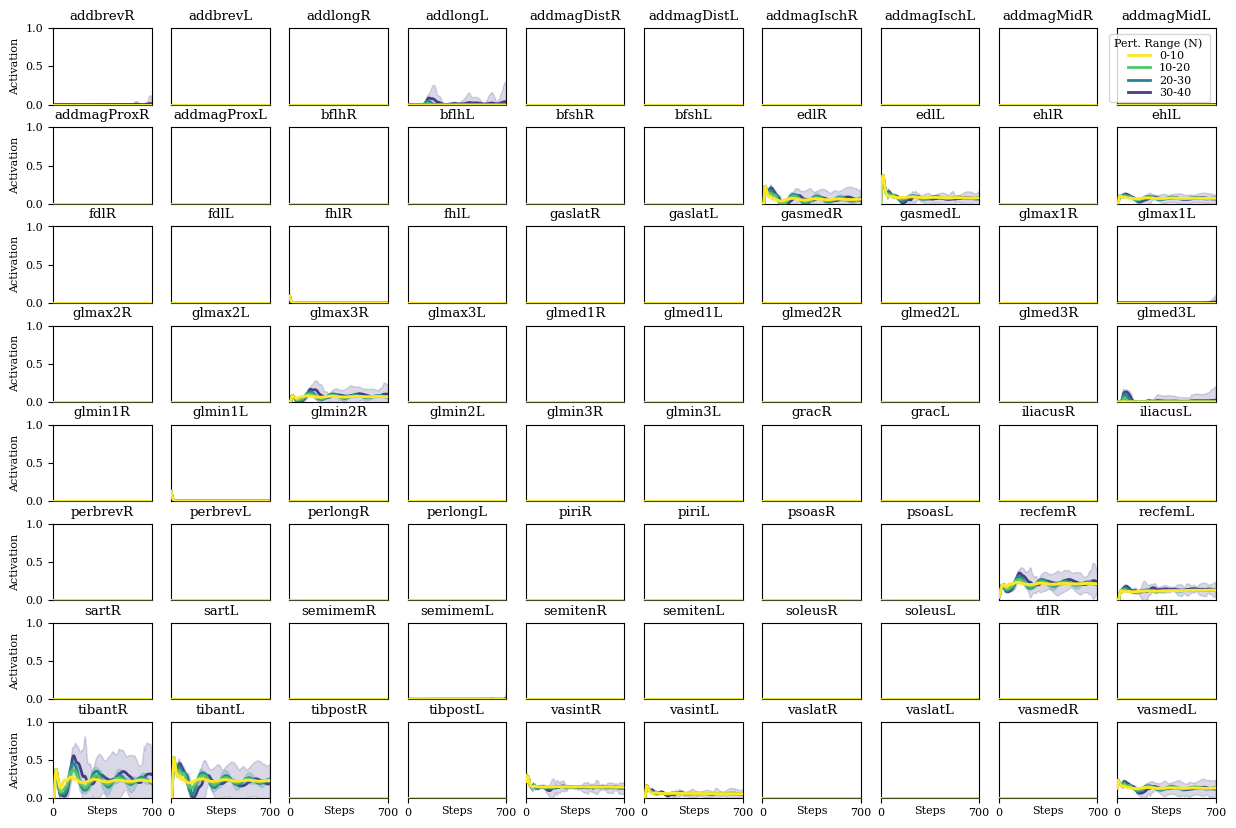

In [36]:
## Plot muscle activations

 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

f, axs  = plt.subplots(nrows = 8, ncols = 10, figsize = (15, 10))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []
for r in range(4): 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = dictCombined[r]

    tendonNames = superDict1[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        if data['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: 
            muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
            RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
            LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        act_muscle = []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit = tendonNames[i].replace('_r_tendon', 'R')
        ax[i*2].set_title(tit)
        ax[i*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
        act_muscle = []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i+40])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
        ax[i*2+1].set_title(tit2)
        ax[i*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2 + 1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])

for i in range(80): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in range(0,80,10): ax[i].set_yticks([])
    else: 
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 70: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[9].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    fig_name = 'meanActSD_pertRange'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

In [38]:
mean_act - 2*std_act

nan

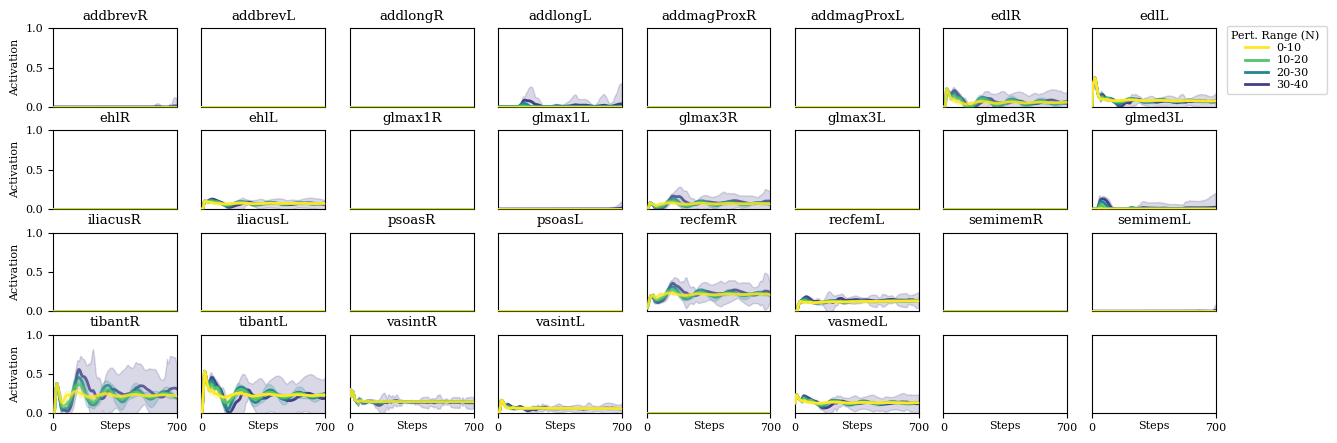

In [41]:
 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

relevant = ['addbrev_r_tendon', 'addlong_r_tendon', 'addmagProx_r_tendon',  'edl_r_tendon', 'ehl_r_tendon',  'gaslat_l_tendon','glmax1_r_tendon',  'glmax3_r_tendon',  'glmed3_r_tendon', 'iliacus_r_tendon',  'psoas_r_tendon', 'recfem_r_tendon',  'semimem_r_tendon', 'tibant_r_tendon', 'vasint_r_tendon',  'vasmed_r_tendon']
f, axs  = plt.subplots(nrows = 4, ncols = 8, figsize = (15,5))
ax = axs.flatten()


r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []
for r in range(5):
    plot = 0 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = dictCombined[r]

    tendonNames = superDict1[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        if data['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: 
            muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
            RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
            LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])
    if not muscleAct :continue
    else: 
        for i in range(40): 
            if tendonNames[i] in relevant: 
                act_muscle = []
                for j in range(len(muscleAct)): 
                    act_muscle.append(muscleAct[j][i])
                mean_act = np.mean(act_muscle, axis = 0)
                std_act = np.std(act_muscle, axis = 0)

                tit = tendonNames[i].replace('_r_tendon', 'R')
                ax[plot*2].set_title(tit)
                ax[plot*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], alpha=0.8, zorder = zo[r])

                ax[plot*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
                act_muscle = []
                for j in range(len(muscleAct)): 
                    act_muscle.append(muscleAct[j][i+40])
                mean_act = np.mean(act_muscle, axis = 0)
                std_act = np.std(act_muscle, axis = 0)
                tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
                ax[plot*2+1].set_title(tit2)
                ax[plot*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
                ax[plot*2 + 1].fill_between(range(700), mean_act - 2*std_act, mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
                plot += 1

for i in range(32): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in [0, 8, 16, 24]: ax[i].set_yticks([])
    else: 
        ax[i].set_yticks([0, 0.5, 1])
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 24: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[7].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1.95, 1.1))
#f.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    fig_name = 'filtered_meanActSD_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Joint Angles and Torques SD

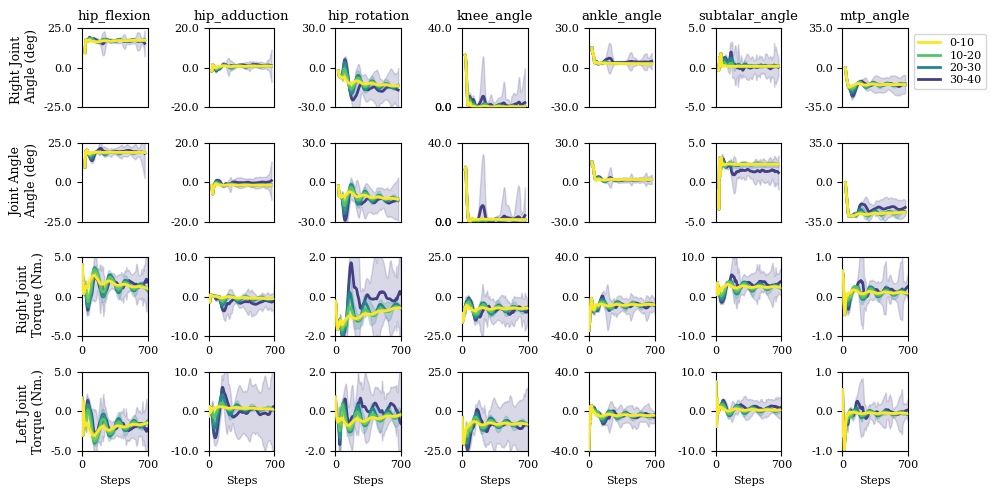

In [40]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter

not_interested = ['knee_angle_r_translation2', 'knee_angle_r_translation1', 'knee_angle_r_rotation2', 'knee_angle_r_rotation3', 'knee_angle_r_beta_translation2', 'knee_angle_r_beta_translation1', 'knee_angle_r_beta_rotation1',  'knee_angle_l_translation2', 'knee_angle_l_translation1', 'knee_angle_l_rotation2', 'knee_angle_l_rotation3', 'knee_angle_l_beta_translation2', 'knee_angle_l_beta_translation1', 'knee_angle_l_beta_rotation1']

# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-25, 25],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-30, 30],
    'Knee Angle': [0, 40],
    'Ankle Angle': [-30, 30],
    'Subtalar Angle': [-5, 5],
    'MTP Angle': [-35, 35]
}

rom_dict = {
    'Hip Flexion': [-5, 5],
    'Hip Adduction': [-10, 10],
    'Hip Rotation': [-2, 2],
    'Knee Angle': [-25, 25],
    'Ankle Angle': [-40, 40],
    'Subtalar Angle': [-10, 10],
    'MTP Angle': [-1, 1]
}

f, axs = plt.subplots(nrows=4, ncols=7, figsize = (10,5))

yl = ['Right Joint \n Angle (deg)', 'Joint Angle\n Angle (deg)', 'Right Joint \n Torque (Nm.)', 'Left Joint \nTorque (Nm.)']
ll = ['R', 'L']
for r in range(len(dictCombined)): 
    
    qtau = []
    for j in range(len(dictCombined[r])): 
        if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: qtau.append(dictCombined[r][j]['jointInfo']['qpos'])

    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            if joint not in not_interested:
                qtau_dict[joint] = {}
                for j in range(len(qtau)): 
                    qtau_dict[joint][j] = np.rad2deg(qtau[j][joint])

        mean_dict, sd_dict = {}, {}
        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)
        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):

                if l == 0: a = 0
                if l == 1: a = 1 
                # ax  = axs[i]
                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r], zorder = zo[r])
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])
                if a == 0: axs[a,i].set_title(key[:-2])
                axs[a,i].set_xticks([])
                axs[a,i].set_ylim(rom_dict_qpos[movement])
                axs[a,i].set_yticks(rom_dict_qpos[movement])
                axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                axs[a,0].set_ylabel(yl[a], fontsize = 9)  
        axs[0,6].legend(fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
        

    qtau = []
    for j in range(len(dictCombined[r])): 
        if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
        else: qtau.append(dictCombined[r][j]['jointInfo']['qtau'])
    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            qtau_dict[joint] = {}
            for j in range(len(qtau)): 
                qtau_dict[joint][j] = qtau[j][joint]

        mean_dict, sd_dict = {}, {}
        for joint in dictCombined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)

        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):
                if l == 0: a = 2
                if l == 1: a = 3 

                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r] , zorder = zo[r])
                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])
                # axs[1,i].set_title(key)
                axs[a,i].set_ylim(rom_dict[movement])
                # axs[a,i].set_yticks(rom_dict[movement])
                axs[a,i].set_xticks([0, 700])
                axs[a,i].set_xlim(0, 700)
                axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
                if a ==3: axs[a,i].set_xlabel('Steps')
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

                axs[a,0].set_ylabel(yl[a], fontsize = 9) 
f.tight_layout()

if save:
    fig_name = 'meanAngleTorqueSD_pertRange'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')    



## Plots including the fallen ones

In [42]:
combined = {}
combined[5] = {}
for i in range(len(dictCombined)): 
    combined[i] = {}

    for j in range(len(dictCombined[i])): 
        mag = dictCombined[i][j]['modelInfo']['perturbationMagnitude'][perturbation_id]
        if mag in ddd: 
            b = len(combined[5])
            combined[5][b] = dictCombined[i][j]
        else: 
            a = len(combined[i])
            combined[i][a] = dictCombined[i][j]

combined.pop(4)
combined[4] = combined.pop(5)
ranges = ['0-10', '10-20', '20-30', '30-40', 'Fallen']

c = np.linspace(0, len(cmap1) - 1, len(ranges), dtype=int)
cmap2 = cmap1[c]
cmap2 = cmap2[::-1]

Muscle Activations

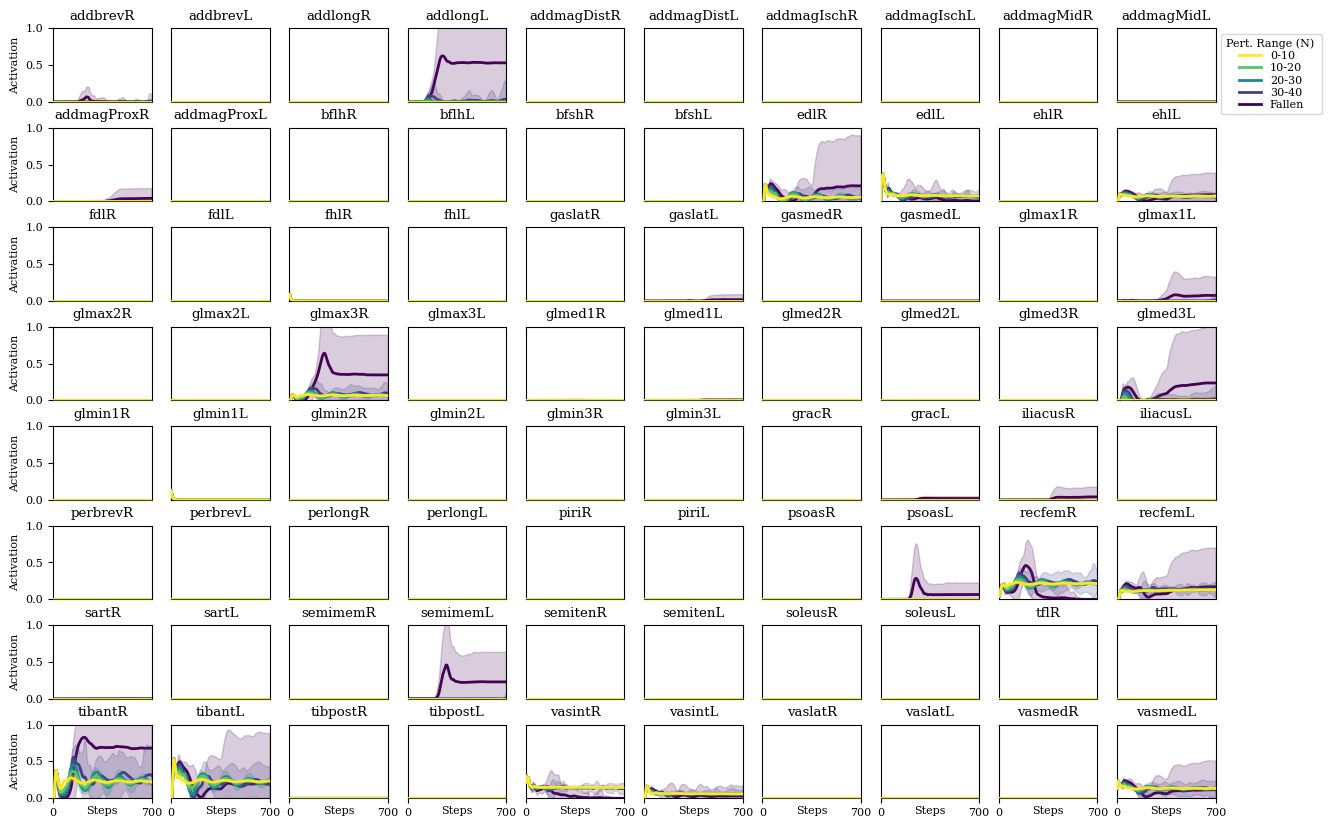

In [43]:
## Plot muscle activations

 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

f, axs  = plt.subplots(nrows = 8, ncols = 10, figsize = (15, 10))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []


for r in range(len(combined)): 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = combined[r]

    tendonNames = superDict[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
        RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
        LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        act_muscle = []
        mean_act, std_act = [], []
        for j in range(len(muscleAct)): 
            act_muscle.append(muscleAct[j][i])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit = tendonNames[i].replace('_r_tendon', 'R')
        ax[i*2].set_title(tit)
        ax[i*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])

        act_muscle = []
        mean_act, std_act = [], []
        for j in range(len(superDict1)): 
            act_muscle.append(muscleAct[j][i+40])
        mean_act = np.mean(act_muscle, axis = 0)
        std_act = np.std(act_muscle, axis = 0)
        tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
        ax[i*2+1].set_title(tit2)
        ax[i*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
        ax[i*2+1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])


for i in range(80): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in range(0,80,10): ax[i].set_yticks([])
    else: 
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 70: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[9].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
plt.subplots_adjust(wspace=0.2, hspace=0.35)

if save:
    fig_name = 'meanActivationSD_pertRangeFallenCombined'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

In [45]:
relevant = ['addbrev_r_tendon', 'addlong_r_tendon', 'addmagProx_r_tendon',  'edl_r_tendon', 'ehl_r_tendon',  'gaslat_r_tendon','glmax1_r_tendon',  'glmax3_r_tendon',  'glmed3_r_tendon', 'iliacus_r_tendon',  'psoas_r_tendon', 'recfem_r_tendon',  'semimem_r_tendon', 'tibant_r_tendon', 'vasint_r_tendon',  'vasmed_r_tendon']


In [47]:
len(relevant)

16

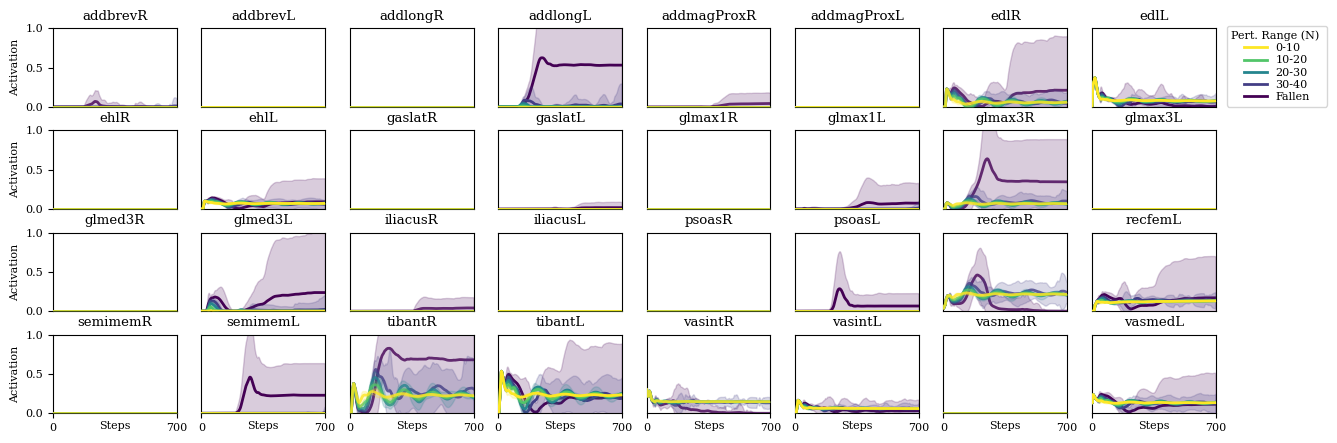

In [48]:
## Plot muscle activations

 # Define the desired order
desired_order = ['psoas', 'tfl', 'iliacus', 'addbrev', 'addlong', 'addmagDist', 'addmagIsch', 'addmagMid', 'addmagProx', 'glmax', 'glmed',
                    'glmax1', 'glmax2', 'glmax3', 'glmed1', 'glmed2', 'glmed3', 'glmin1', 'glmin2', 'glmin3', 'piri', 'grac', 'sart', 'vasint', 'vaslat', 'vasmed', 'recfem', 'semimem', 'semiten', 'bflh', 'bfsh',
                    'tibant', 'tibpost', 'soleus', 'gaslat', 'gasmed', 'perbrev', 'perlong', 'edl', 'ehl', 'fdl', 'fhl']

relevant = ['addbrev_r_tendon', 'addlong_r_tendon', 'addmagProx_r_tendon',  'edl_r_tendon', 'ehl_r_tendon',  'gaslat_r_tendon','glmax1_r_tendon',  'glmax3_r_tendon',  'glmed3_r_tendon', 'iliacus_r_tendon',  'psoas_r_tendon', 'recfem_r_tendon',  'semimem_r_tendon', 'tibant_r_tendon', 'vasint_r_tendon',  'vasmed_r_tendon']

f, axs  = plt.subplots(nrows = 4, ncols = 8, figsize = (15, 5))
ax = axs.flatten()
r_leg_max, l_leg_max = [], []
r_leg_std, l_leg_std = [], []

for r in range(len(combined)): 
    plot = 0 
    muscleNames, muscleAct, RmuscleAct, LmuscleAct = [], [], [], []

    superDict1 = combined[r]

    tendonNames = superDict[0]['modelInfo']['tendonNames']
    for tendon in tendonNames[:40]: muscleNames.append(tendon.replace('_r_tendon', ''))

    for j in range(len(superDict1)): 
        data = superDict1[j]
        muscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T)
        RmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[:40])
        LmuscleAct.append(np.array(data['muscleInfo']['muscleActivation']).T[40:])

    for i in range(40): 
        if tendonNames[i] in relevant: 
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)

            tit = tendonNames[i].replace('_r_tendon', 'R')
            ax[plot*2].set_title(tit)
            ax[plot*2].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], alpha=0.8, zorder = zo[r])

            ax[plot*2].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            act_muscle = []
            for j in range(len(muscleAct)): 
                act_muscle.append(muscleAct[j][i+40])
            mean_act = np.mean(act_muscle, axis = 0)
            std_act = np.std(act_muscle, axis = 0)
            tit2 = tendonNames[i+40].replace('_l_tendon', 'L')
            ax[plot*2+1].set_title(tit2)
            ax[plot*2+1].plot(mean_act, label = ranges[r], linewidth = 2, color = cmap2[r], zorder = zo[r])
            ax[plot*2 + 1].fill_between(range(700), mean_act - 2*std_act,mean_act + 2*std_act, alpha=0.2, color = cmap2[r], zorder = zo[r])
            plot += 1

for i in range(32): 
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 700])
    if i not in [0, 8, 16, 24]: ax[i].set_yticks([])
    else: 
        ax[i].set_yticks([0, 0.5, 1])
        ax[i].set_ylabel('Activation')
    if i < 70: ax[i].set_xticks([])
    if i >= 24: 
        ax[i].set_xticks([0, 700])
        ax[i].set_xlabel('Steps')
        ax[i].xaxis.set_label_coords(.5, -.1)
ax[7].legend(title = 'Pert. Range (N) ', fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1.95, 1.1))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

if save:
    fig_name = 'filtered_meanActivationSD_pertRangeFallenCombined'
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Joint Angles and Torques SD

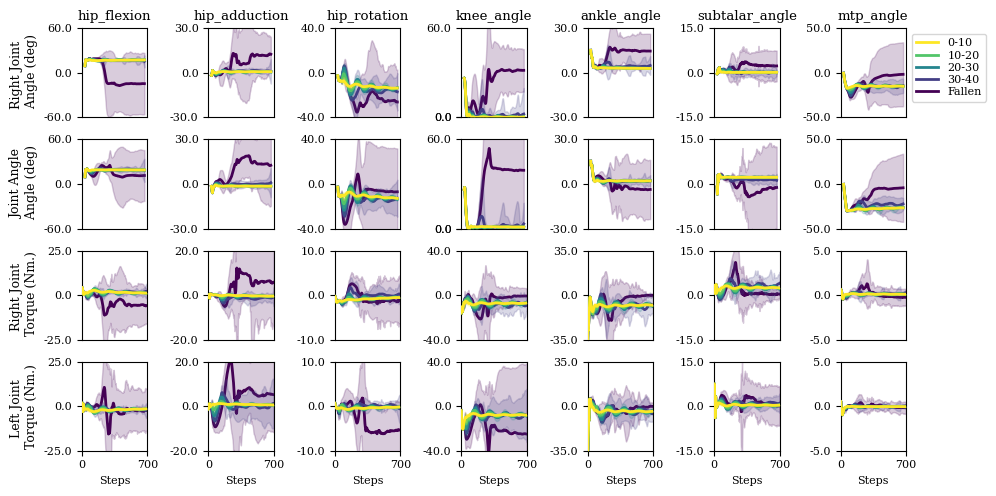

In [ ]:
## Plotting joint torques for 5 trials

from matplotlib.ticker import FormatStrFormatter


# axs = axs.flatten()
movement_dict = {
    'Hip Flexion': ['hip_flexion_r', 'hip_flexion_l'],
    'Hip Adduction': ['hip_adduction_r', 'hip_adduction_l'],
    'Hip Rotation': ['hip_rotation_r', 'hip_rotation_l'],
    'Knee Angle': ['knee_angle_r', 'knee_angle_l'],
    'Ankle Angle': ['ankle_angle_r', 'ankle_angle_l'],
    'Subtalar Angle': ['subtalar_angle_r', 'subtalar_angle_l'],
    'MTP Angle': ['mtp_angle_r', 'mtp_angle_l']
}

rom_dict_qpos = {
    'Hip Flexion': [-60, 60],
    'Hip Adduction': [-30, 30],
    'Hip Rotation': [-40, 40],
    'Knee Angle': [0, 60],
    'Ankle Angle': [-30, 30],
    'Subtalar Angle': [-15, 15],
    'MTP Angle': [-50, 50]
}

rom_dict = {
    'Hip Flexion': [-25, 25],
    'Hip Adduction': [-20, 20],
    'Hip Rotation': [-10, 10],
    'Knee Angle': [-40, 40],
    'Ankle Angle': [-35, 35],
    'Subtalar Angle': [-15, 15],
    'MTP Angle': [-5, 5]
}

f, axs = plt.subplots(nrows=4, ncols=7, figsize = (10,5))

yl = ['Right Joint \n Angle (deg)', 'Joint Angle\n Angle (deg)', 'Right Joint \n Torque (Nm.)', 'Left Joint \nTorque (Nm.)']
ll = ['R', 'L']
for r in range(len(combined)): 
    
    qtau = []
    for j in range(len(combined[r])): 
        
        qtau.append(combined[r][j]['jointInfo']['qpos'])

    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in combined[r][j]['modelInfo']['jointNames']: 
            if joint not in not_interested:
                qtau_dict[joint] = {}
                for j in range(len(qtau)): 
                    qtau_dict[joint][j] = np.rad2deg(qtau[j][joint])

        mean_dict, sd_dict = {}, {}
        for joint in combined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)
        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):

                if l == 0: a = 0
                if l == 1: a = 1 
                # ax  = axs[i]
                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r], zorder = zo[r])

                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])

                if a == 0: axs[a,i].set_title(key[:-2])
                axs[a,i].set_xticks([])
                axs[a,i].set_ylim(rom_dict_qpos[movement])
                axs[a,i].set_yticks(rom_dict_qpos[movement])
                axs[a,i].set_yticks([rom_dict_qpos[movement][0], 0, rom_dict_qpos[movement][1]])
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                axs[a,0].set_ylabel(yl[a], fontsize = 9)  
        axs[0,6].legend(fontsize = 8, labelspacing = 0.2, bbox_to_anchor=(1, 1))
        

    qtau = []
    for j in range(len(combined[r])): 
        qtau.append(combined[r][j]['jointInfo']['qtau'])
    if not qtau: continue
    else: 
        
        qtau_dict = {}

        for joint in combined[r][j]['modelInfo']['jointNames']: 
            qtau_dict[joint] = {}
            for j in range(len(qtau)): 
                qtau_dict[joint][j] = qtau[j][joint]

        mean_dict, sd_dict = {}, {}
        for joint in combined[r][j]['modelInfo']['jointNames']: 
            tau = []
            if joint not in not_interested:
                mean_dict[joint], sd_dict[joint] = {}, {}
                for j in range(len( qtau_dict[joint])): 
                    tau.append(qtau_dict[joint][j])
                mean_dict[joint] = np.mean(tau, axis = 0)
                sd_dict[joint] = np.std(tau, axis = 0)

        steps = 700
        for i, (movement, keys) in enumerate(movement_dict.items()):
            # print(keys)

            for l, key in enumerate(keys):
                if l == 0: a = 2
                if l == 1: a = 3 

                axs[a, i].plot(mean_dict[key], color = cmap2[r], linewidth= 2, label = ranges[r] , zorder = zo[r])

                axs[a, i].fill_between(range(700), mean_dict[key] - 2*sd_dict[key],mean_dict[key] + 2*sd_dict[key],  color=cmap2[r], alpha=0.2, zorder = zo[r])

                # axs[1,i].set_title(key)
                axs[a,i].set_ylim(rom_dict[movement])
                # axs[a,i].set_yticks(rom_dict[movement])
                if a == 3: axs[a,i].set_xticks([0, 700])
                else:  axs[a,i].set_xticks([])
                axs[a,i].set_xlim(0, 700)
                axs[a,i].set_yticks([rom_dict[movement][0], 0, rom_dict[movement][1]])
                if a ==3: axs[a,i].set_xlabel('Steps')
                axs[a,i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

                axs[a,0].set_ylabel(yl[a], fontsize = 9) 
f.tight_layout()

if save:
    fig_name = 'jointAngleAndTorqueSD_FallenCombined_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')



# AP and ML Perturbation

Load data

In [34]:
fig_path = 'C:/Users/Carlota/Desktop/NewFigs'


# Load policy results
policy = '2023_06_21_21_18_35'
env_name = 'myoLegReachFixed-v2'
pkl_path = 'C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
perturbation_id = 0 # 1 - AP, 0 - ML

save = True # Mark as True to save the plots in fig_path
dataDict = {}
for k in range(200):
    data_path = pkl_path + str(k) + '.pkl'
    print(data_path)
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    dataDict[k] = data
ntrials = len(dataDict)

# Rearrange reward dictionary
for i in range(ntrials): 
    finalReward = {}
    for d in dataDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    dataDict[i]['modelInfo']['rewardDict'] = {}
    dataDict[i]['modelInfo']['rewardDict'] = finalReward

dataDictML = dataDict

## Arrange dictionary based on magnitude of perturbation force. 
data1 = []
for i in range(ntrials): 
    data1.append([i, np.round(dataDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(dataDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*dataDict[i]["modelInfo"]["perturbationTime"], 0)])

df1 = pd.DataFrame(data = data1,columns = ["Trial", "Magnitude", "Time", "Step"])
df_find = df1
order = df1.sort_values(by='Magnitude')['Trial']

superDict = {}
for i, j in enumerate(order): 
    superDict[i] = dataDict[j]

superDictML = superDict

## Arrange dictionary based on magnitude of perturbation force. 
data = []
for i in range(ntrials): 
    data.append([i, np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(superDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*superDict[i]["modelInfo"]["perturbationTime"], 0)])
df = pd.DataFrame(data = data,columns = ["Trial", "Magnitude", "Time", "Step"])
dfML = df


C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_0.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_1.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_2.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_3.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_4.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_35_5.pkl
C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/myoLegReachFixed-v2/evaluation/2023_06_21_21_18_35/2023_06_21_21_18_3

In [35]:
# Load policy results
policy = '2023_05_25_17_25_29'
env_name = 'myoLegReachFixed-v2'
pkl_path = 'C:/Users/Carlota/OneDrive - University of Twente/Master Thesis/pkl/' + env_name + '/evaluation/' + policy + '/' + policy +'_' 
perturbation_id = 1 # 1 - AP, 0 - ML

save = True # Mark as True to save the plots in fig_path
dataDict = {}
for k in range(200):
    data_path = pkl_path + str(k) + '.pkl'
    #print(data_path)
    with open(data_path, "rb") as input_file:
        data = pickle.load(input_file)
    dataDict[k] = data
ntrials = len(dataDict)

# Rearrange reward dictionary
for i in range(ntrials): 
    finalReward = {}
    for d in dataDict[i]['modelInfo']['rewardDict']:
        for key, value in d.items():
            if key not in finalReward:
                finalReward[key] = []
            finalReward[key].append(value)
    dataDict[i]['modelInfo']['rewardDict'] = {}
    dataDict[i]['modelInfo']['rewardDict'] = finalReward
dataDictAP = dataDict


## Arrange dictionary based on magnitude of perturbation force. 
data1 = []
for i in range(ntrials): 
    data1.append([i, np.round(dataDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(dataDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*dataDict[i]["modelInfo"]["perturbationTime"], 0)])

df1 = pd.DataFrame(data = data1,columns = ["Trial", "Magnitude", "Time", "Step"])
df_find = df1
order = df1.sort_values(by='Magnitude')['Trial']

superDict = {}
for i, j in enumerate(order): 
    superDict[i] = dataDict[j]
superDictAP = superDict

## Arrange dictionary based on magnitude of perturbation force. 
data = []
for i in range(ntrials): 
    data.append([i, np.round(superDict[i]["modelInfo"]["perturbationMagnitude"][perturbation_id],2), np.round(superDict[i]["modelInfo"]["perturbationTime"], 3), np.round(100*superDict[i]["modelInfo"]["perturbationTime"], 0)])
df = pd.DataFrame(data = data,columns = ["Trial", "Magnitude", "Time", "Step"])
dfAP = df



In [36]:
policy = 'COMBINED'
# Generate colormap
viridis = cm.get_cmap('viridis', 12)
cmap1 = viridis.colors

# Generate an array of values ranging from 0 to 1
values = np.linspace(0, 1, ntrials)
cmap = ListedColormap(plt.cm.viridis(values)).colors

c = np.linspace(0, len(cmap1) - 1, 5, dtype=int)
cmap2 = cmap1[c]
cmap2 = cmap2[::-1]

perturbation_idAP = 1
perturbation_idML = 0

C:\Users\Carlota\AppData\Local\Temp\ipykernel_13660\3372189381.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


Training reward

In [ ]:
dataAP = superDictAP[0]
dataML = superDictML[0]

# Train reward
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3.54, 3.54))

xAP = np.linspace(0, dataAP['modelInfo']['trainingSteps']/1000000, len(dataAP['tensorBoard']['epMeanReward']))
xML = np.linspace(0, dataML['modelInfo']['trainingSteps']/1000000, len(dataML['tensorBoard']['epMeanReward']))

ax.plot(xAP, dataAP['tensorBoard']['epMeanReward'], color = cmap1[1], label = 'AP')
ax.plot(xML, dataML['tensorBoard']['epMeanReward'], color = cmap1[8], label = 'ML')
ax.set_xlim(0, 20)
ax.set_xticks(np.round(np.linspace(0, 20, 5)))
ax.set_xlabel('Training Steps (Million)')
ax.set_ylabel('Reward')
ax.grid()
ax.legend()

if save: 
    fig_name = 'trainingReward'
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight') 

When does the model fall per perturbation magnitude

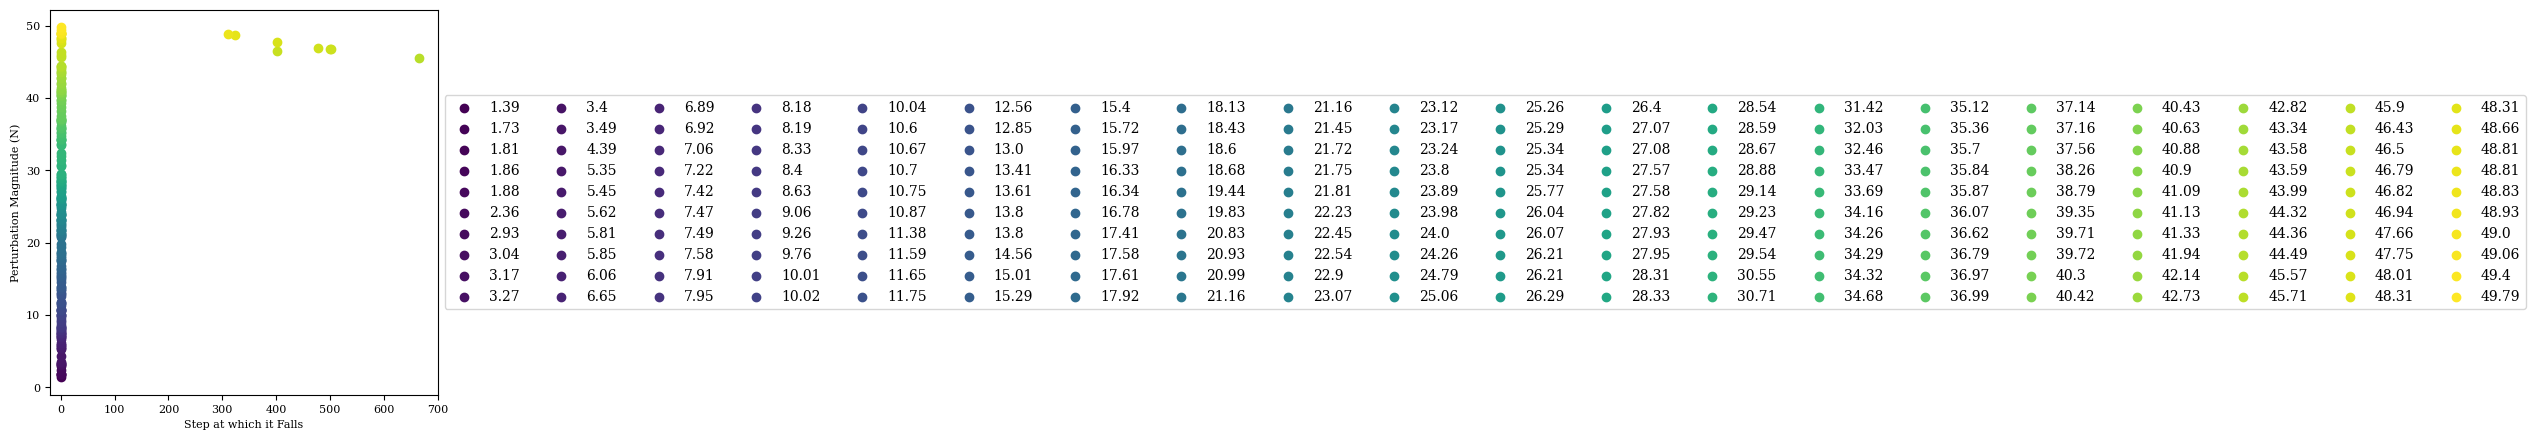

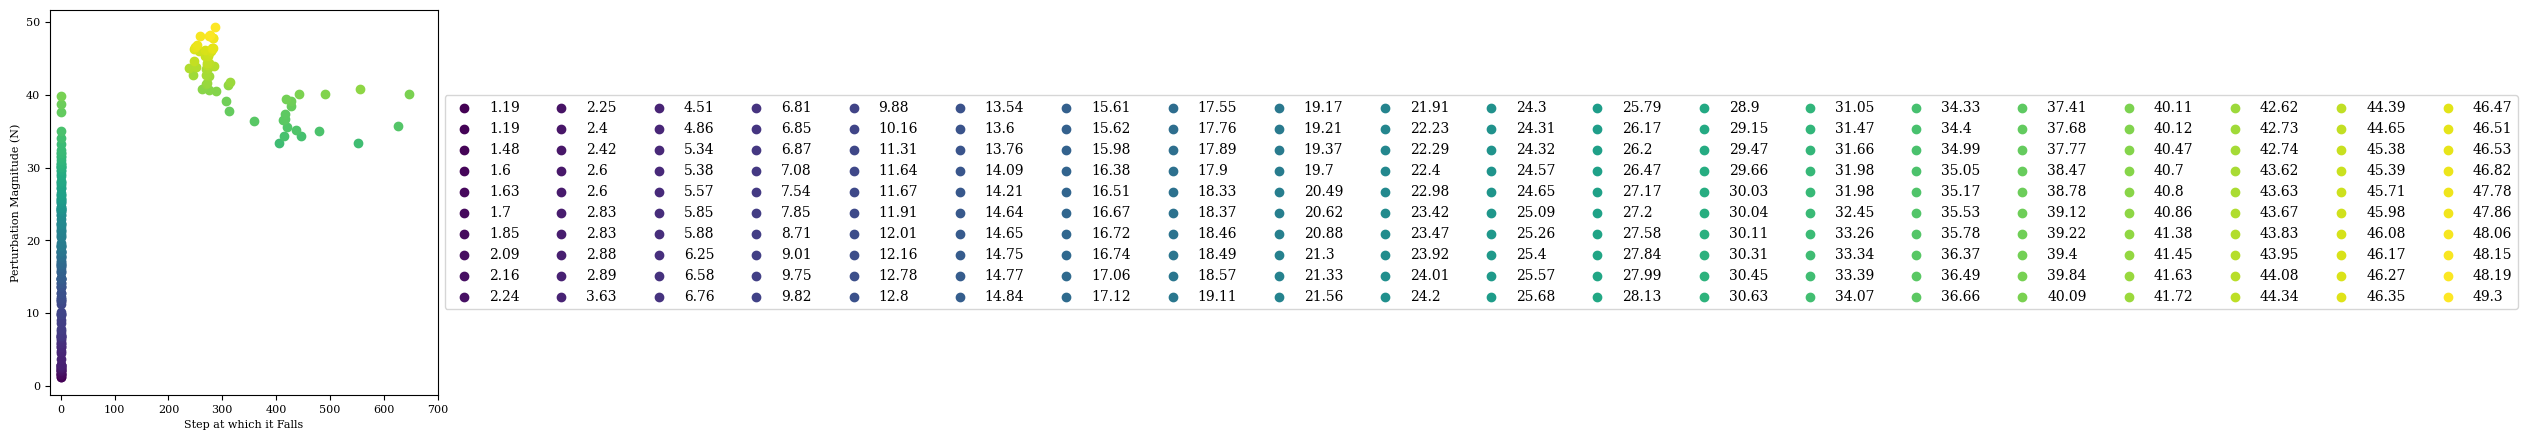

In [37]:
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

when_listAP, mag_listAP = [], []
for i in range(ntrials):
    arr = superDictAP[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    mag = (np.round(superDictAP[i]["modelInfo"]["perturbationMagnitude"][perturbation_idAP],2))
    when_listAP.append(when)
    mag_listAP.append(mag)
    ax.scatter(when, mag, label = mag, color = cmap[i])

ax.set_xlim(-20, 700)
ax.legend(loc='center left', ncols = ntrials /10,  bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Perturbation Magnitude (N)')
ax.set_xlabel('Step at which it Falls')

nonzero_values = []
idxAP = []
for i, value in  enumerate(when_listAP):
    if value != 0:
        idxAP.append(i)
        nonzero_values.append(value)


f,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

when_listML, mag_listML = [], []
for i in range(ntrials):
    arr = superDictML[i]['modelInfo']['rewardDict']['done']
    when = ((np.array(arr) != 0).argmax(axis = 0))
    mag = (np.round(superDictML[i]["modelInfo"]["perturbationMagnitude"][perturbation_idML],2))
    when_listML.append(when)
    mag_listML.append(mag)
    ax.scatter(when, mag, label = mag, color = cmap[i])

ax.set_xlim(-20, 700)
ax.legend(loc='center left', ncols = ntrials /10,  bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Perturbation Magnitude (N)')
ax.set_xlabel('Step at which it Falls')

nonzero_values = []
idxML = []
for i, value in  enumerate(when_listML):
    if value != 0:
        idxML.append(i)
        nonzero_values.append(value)


Distribution of magnitude and steps

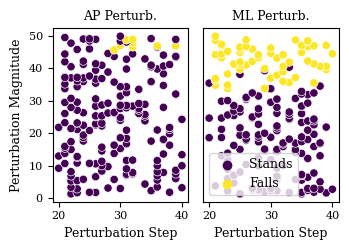

In [38]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (3.54, 2.54))

hue_list = ['Stands' if element == 0 else 'Falls' for element in when_listAP]
sns.scatterplot(ax = ax[0], data = dfAP, x = 'Step', y = 'Magnitude', hue = hue_list, 
                palette = [cmap1[0], cmap1[-1]])
ax[0].set_ylabel('Perturbation Magnitude', fontsize = 9)
ax[0].set_xlabel('Perturbation Step', fontsize = 9)

# Add legend with custom handles and labels
# ax[0].legend(loc='lower left')

hue_list = ['Stands' if element == 0 else 'Falls' for element in when_listML]
sns.scatterplot(ax = ax[1], data = dfML, x = 'Step', y = 'Magnitude', hue = hue_list, 
                palette = [cmap1[0], cmap1[-1]])
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_xlabel('Perturbation Step', fontsize = 9)

# Add legend with custom handles and labels
ax[1].legend(loc='lower left', fontsize = 9)
ax[0].get_legend().remove()

ax[0].set_title('AP Perturb.', fontsize = 9)
ax[1].set_title('ML Perturb.', fontsize = 9)
plt.tight_layout()
 
if save:
    fig_name = 'fallsMagnitude'
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    plt.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight') 

## Plots per perturbation range

In [39]:
pert_whenAP, pert_magAP = [],[]
for i in range(len(when_listAP)): 
    if when_listAP[i] == 0: continue
    else: 
        pert_whenAP.append(when_listAP[i])
        pert_magAP.append(mag_listAP[i])

dictCombinedAP = {}
dddAP = []
for j in range(5): dictCombinedAP[j] = {}

for i in range(ntrials): 
    perturbationMagnitude = superDictAP[i]['modelInfo']['perturbationMagnitude'][perturbation_idAP]
    if np.round(perturbationMagnitude,2) in pert_magAP: dddAP.append(perturbationMagnitude)
    if perturbationMagnitude <= 10: d = 0
    elif 10 < perturbationMagnitude <= 20: d = 1
    elif 20 < perturbationMagnitude <= 30: d = 2
    elif 30 < perturbationMagnitude <= 40: d = 3
    elif 40 < perturbationMagnitude <= 50: d = 4
    l = len(dictCombinedAP[d])
    dictCombinedAP[d][l] = superDictAP[i]

pert_whenML, pert_magML = [],[]
for i in range(len(when_listML)): 
    if when_listML[i] == 0: continue
    else: 
        pert_whenML.append(when_listML[i])
        pert_magML.append(mag_listML[i])

dictCombinedML = {}
dddML = []
for j in range(5): dictCombinedML[j] = {}

for i in range(ntrials): 
    perturbationMagnitude = superDictML[i]['modelInfo']['perturbationMagnitude'][perturbation_idML]
    if np.round(perturbationMagnitude,2) in pert_magML: dddML.append(perturbationMagnitude)
    if perturbationMagnitude <= 10: d = 0
    elif 10 < perturbationMagnitude <= 20: d = 1
    elif 20 < perturbationMagnitude <= 30: d = 2
    elif 30 < perturbationMagnitude <= 40: d = 3
    elif 40 < perturbationMagnitude <= 50: d = 4
    l = len(dictCombinedML[d])
    dictCombinedML[d][l] = superDictML[i]
ranges = ['0-10', '10-20', '20-30', '30-40', '40-50']


In [40]:
zo = np.linspace(len(dictCombinedAP)-1, 0, num=len(dictCombinedAP))

COM Movement

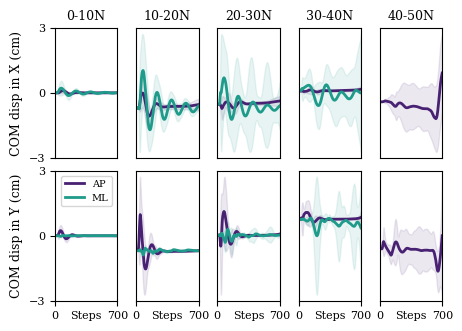

In [41]:
f, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (5, 3.54)) 
k = [1,8]
labels = ['AP', 'ML']
for p in range(2): 
    if p == 0: 
        dictCombined = dictCombinedAP
        perturbation_id = perturbation_idAP
        ddd = dddAP
    if p == 1: 
        dictCombined = dictCombinedML
        perturbation_id = perturbation_idML
        ddd = dddML

    for r in range(5): 
        com = []
        for j in range(len(dictCombined[r])): 
            if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
            else: com.append(np.array(dictCombined[r][j]['bodyInfo']['com']).T)

        com_x, com_y = [],[]
        for i in range(len(com)): 
            com_x.append(com[i][0])
            com_y.append(com[i][1])

        if not com: continue

        ax = axs[:,r]
        lim = 3
        l = ['X axis', 'Y axis']
        for i in range(2): 
            if i == 0: data = com_x - com_x[0]
            elif i == 1: data = com_y - com_y[0]
            mean = np.mean(data, axis = 0)*100
            std = np.std(data, axis = 0)*100
            ax[i].plot(mean, color=cmap1[k[p]], linewidth = 2, label = labels[p])
            ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[k[p]], alpha=0.1)
            #ax[i].set_ylim(-lim, lim)
            #ax[0,i].set_title(l[i])
            ax[i].set_xlim(0, 700)
            if r != 0: ax[i].set_yticks([])
            if i == 0: ax[i].set_xticks([])
            else: ax[i].set_xticks([0, 700])  
            #ax[i].set_xlabel('Steps')
            if r == 0: ax[i].set_yticks([-lim, 0, lim])
            if i == 1: 
                ax[i].set_xlabel('Steps',fontsize = 8)
                ax[i].xaxis.set_label_coords(.5, -0.08)


        axs[0,r].set_title(ranges[r] + 'N',fontsize = 9)
# axs[0,3].legend(fontsize = 9, loc = 'upper right', bbox_to_anchor=(3.6, 1))
axs[1,0].legend(fontsize = 7)
axs[0,0].set_ylabel('COM disp in X (cm)',fontsize = 9)
axs[1,0].set_ylabel('COM disp in Y (cm)',fontsize = 9)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.1)

if save:
    os.makedirs(fig_path + '/' + policy + '/', exist_ok=True)
    fig_name = 'meancomDisp_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

COM Movement Scatter

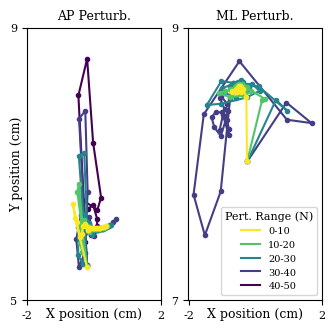

In [42]:
f, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (3.8, 3.54))

k = [1,8]
labels = ['AP', 'ML']
for p in range(2): 
    if p == 0: 
        dictCombined = dictCombinedAP
        perturbation_id = perturbation_idAP
        ddd = dddAP
    if p == 1: 
        dictCombined = dictCombinedML
        perturbation_id = perturbation_idML
        ddd = dddML

    for r in range(5): 
        com, bos = [], []
        for j in range(len(dictCombined[r])): 
            if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
            else:
                com.append(np.array(dictCombined[r][j]['bodyInfo']['com']).T)
                bos.append(np.array(dictCombined[r][j]['bodyInfo']['bos']))
        if not com: continue
        com_x, com_y = [],[]
        for i in range(len(com)): 
            com_x.append(com[i][0])
            com_y.append(com[i][1])

        comX = np.mean(com_x, axis = 0)
        comY = np.mean(com_y, axis = 0)

        # Convert the list of arrays into a NumPy array
        bos_mean = np.mean(bos, axis=0)

        # ax.scatter(comX, comY)
        """ for i in range(0, 701, 100): 
            if i == 700: i = 699
            corners = bos_mean[i,:].reshape(2,4)
            polygon = Polygon(corners[:,[0,1,3,2]].T, color = 'lightgray', closed=True, fill=False, alpha = 1, edgecolor='none')
            plt.add_patch(polygon)  """  
        ax = axs[p]
        x, y =[],[]
        for i in range(1, dictCombined[r][0]['modelInfo']['testSteps'], 25):
            ax.plot(comX[i], comY[i], marker = '.',  color = cmap2[r], zorder = zo[r])
            x.append(comX[i])
            y.append(comY[i])
        ax.plot(x[1:], y[1:], color = cmap2[r], label = ranges[r], zorder = zo[r])
        
        #ax.set_aspect('equal')
        #ax.set_yticks([0.05, 0.09], [5, 9])
        #ax.set_ylim([0.05, 0.09])
        if p == 0: 
            ax.set_ylabel('Y position (cm)', fontsize = 9)
            ax.yaxis.set_label_coords(-.03, .5)
            #ax.legend(title = 'Pert. Range (N)', fontsize = 8, loc = 'upper right', bbox_to_anchor=(3.05, 1))
            ax.set_yticks([0.05, 0.09], [5, 9])
            ax.set_ylim([0.05, 0.09])
            ax.set_xticks([-0.02, 0.02], [-2, 2])
        elif p == 1: 
            ax.set_yticks([0.07, 0.09], [7, 9])
            ax.set_ylim([0.07, 0.09])
            ax.set_xticks([-0.02, 0.02], [-2, 2])
        #ax.set_xticks([-0.02, 0.02], [-2, 2])
        ax.set_xlabel('X position (cm)', fontsize = 9)
        ax.xaxis.set_label_coords(.5, -.025)
axs[0].set_title('AP Perturb.', fontsize = 9)
axs[1].set_title('ML Perturb.', fontsize = 9)
axs[0].legend(title = 'Pert. Range (N)', fontsize = 7, bbox_to_anchor=(2.2, 0.36)) #, loc = 'upper right', bbox_to_anchor=(3.05, 1))
axs[1].set_zorder(-1)
if save:
    fig_name = 'meancomDispScatter_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')

Pelvis Error

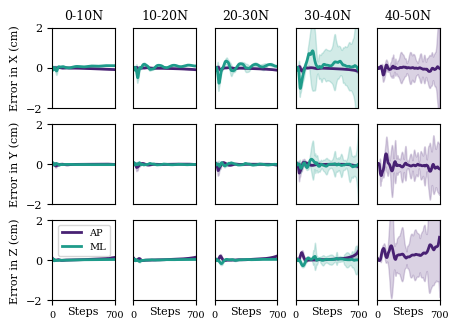

In [43]:
f, axs = plt.subplots(nrows = 3, ncols =5, figsize = (5, 3.54)) 

k = [1,6]
labels = ['AP', 'ML']
for p in range(2): 
    if p == 0: 
        dictCombined = dictCombinedAP
        perturbation_id = perturbation_idAP
        ddd = dddAP
        idx = idxAP
    if p == 1: 
        dictCombined = dictCombinedML
        perturbation_id = perturbation_idML
        ddd = dddML
        idx = idxML
    for r in range(5): 
        error = []
        for j in range(len(dictCombined[r])): 
            if dictCombined[r][j]['modelInfo']['perturbationMagnitude'][perturbation_id] in ddd: continue
            else: error.append(np.array(dictCombined[r][j]['modelInfo']['reachError']).T)

        error_x, error_y, error_z = [],[],[]
        for i in range(len(error)): 
            if i in idx: continue
            else: 
                error_x.append(error[i][0])
                error_y.append(error[i][1])
                error_z.append(error[i][2])

        if not error: continue
        ax = axs[:, r]
        l = ['Error in X (cm)', 'Error in Y (cm)', 'Error in Z (cm)']
        lim = 2
        for i in range(3): 
            if i == 0: data = error_x
            elif i == 1: data = error_y
            elif i == 2: data = error_z
            mean = np.mean(data, axis = 0)*100
            std = np.std(data, axis = 0)*100
            ax[i].plot(mean, color=cmap1[k[p]], linewidth = 2, label = labels[p])
            ax[i].fill_between(range(700), mean - 2*std,mean + 2*std,  color=cmap1[k[p]], alpha=0.2)

            
            ax[i].set_ylim(-lim, lim)
            ax[i].set_yticks([-lim, 0, lim])
            #ax[i].set_title(l[i])
            ax[i].set_xlim(0, 700)
            ax[i].set_xticks([]) 
            #ax[i].set_xlabel('Steps')
            ax[i].xaxis.set_label_coords(.5, -0.05)
            
            if r != 0: ax[i].set_yticks([])
            if i == 2: 
                ax[i].set_xticks([0, 700], [0, 700], fontsize = 7)  
                ax[i].set_xlabel('Steps',fontsize = 8)
                ax[i].xaxis.set_label_coords(.5, -0.08)
            if r == 0: ax[i].set_ylabel(l[i])
        axs[0,r].set_title(ranges[r] + 'N', fontsize = 9)
        plt.subplots_adjust(wspace=0.3, hspace=0.2)
        f.align_labels()
#axs[0,3].legend(fontsize = 9, loc = 'upper right', bbox_to_anchor=(3.6, 1))
axs[2,0].legend(fontsize = 7)


if save:
    fig_name = 'meanPelvisError_pertRange'
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.png', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.png', dpi=600, transparent=True, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '.svg', dpi=600, transparent=False, bbox_inches='tight')
    f.savefig(fig_path + '/' + policy + '/' + policy + '_' + fig_name + '_transparent.svg', dpi=600, transparent=True, bbox_inches='tight')